
## Increasing Property Value for Homeowners

#### This notebook will show homeowners that adding bathrooms and upgrading house grade will increase residential property value.

In [1]:
# import libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import os  
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Construct the absolute file path to your dataset
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "housepj", "kc_house_data.csv")

# Read the CSV file and store it as a DataFrame
df = pd.read_csv(file_path)

# Review first 5 data 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>King County Housing Data Description</title>
</head>
<body>

<h1>Data Description for King County Housing Dataset</h1>

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>id</td>
        <td>Unique identifier for a house</td>
    </tr>
    <tr>
        <td>date</td>
        <td>Date the house was sold</td>
    </tr>
    <tr>
        <td>price</td>
        <td>Sale price (prediction target)</td>
    </tr>
    <tr>
        <td>bedrooms</td>
        <td>Number of bedrooms</td>
    </tr>
    <tr>
        <td>bathrooms</td>
        <td>Number of bathrooms</td>
    </tr>
    <tr>
        <td>sqft_living</td>
        <td>Square footage of living space in the home</td>
    </tr>
    <tr>
        <td>sqft_lot</td>
        <td>Square footage of the lot</td>
    </tr>
    <tr>
        <td>floors</td>
        <td>Number of floors (levels) in the house</td>
    </tr>
    <tr>
        <td>waterfront</td>
        <td>Whether the house is on a waterfront</td>
    </tr>
    <tr>
        <td>greenbelt</td>
        <td>Whether the house is adjacent to a green belt</td>
    </tr>
    <tr>
        <td>nuisance</td>
        <td>Whether the house has traffic noise or other recorded nuisances</td>
    </tr>
    <tr>
        <td>view</td>
        <td>Quality of view from the house</td>
    </tr>
    <tr>
        <td>condition</td>
        <td>Overall condition of the house (related to maintenance)</td>
    </tr>
    <tr>
        <td>grade</td>
        <td>Overall grade of the house (related to construction and design)</td>
    </tr>
    <tr>
        <td>heat_source</td>
        <td>Heat source for the house</td>
    </tr>
    <tr>
        <td>sewer_system</td>
        <td>Sewer system for the house</td>
    </tr>
    <tr>
        <td>sqft_above</td>
        <td>Square footage of the house apart from the basement</td>
    </tr>
    <tr>
        <td>sqft_basement</td>
        <td>Square footage of the basement</td>
    </tr>
    <tr>
        <td>sqft_garage</td>
        <td>Square footage of garage space</td>
    </tr>
    <tr>
        <td>sqft_patio</td>
        <td>Square footage of outdoor porch or deck space</td>
    </tr>
    <tr>
        <td>yr_built</td>
        <td>Year when the house was built</td>
    </tr>
    <tr>
        <td>yr_renovated</td>
        <td>Year when the house was renovated</td>
    </tr>
    <tr>
        <td>address</td>
        <td>Street address</td>
    </tr>
</table>

</body>
</html>




## Descriptive Statistics
#### Viewing the count, mean, std, min, 25%, 50%, 75%, and max of each column in the full dataset (add bullet points and description)

In [3]:
#descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
#display all columns 
pd.set_option('display.max_columns', None)
# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

#### Pre-cleaned Dataset: 30,155 Houses

#### Changed 'Renovation yr' to 'Renovation Status' to numerically intepret data
#### Created two dumbie variables 'No Renovation' and 'Renovation' to numerically intepret data

In [5]:
# Create a new column 'renovation_status' based on 'yr_renovated'
df['renovation_status'] = df['yr_renovated'].apply(lambda x: 'No Renovation' if x == 0 else 'Renovation')

# Display unique values to verify the changes
print(df['renovation_status'].unique())

# Display unique values of 'renovation_status'
print(df['renovation_status'].unique())

# Display value counts of 'renovation_status'
print(df['renovation_status'].value_counts())

renovation_stats = df.groupby('renovation_status')['price'].describe()

# Display the results
print(renovation_stats)

['No Renovation' 'Renovation']
['No Renovation' 'Renovation']
No Renovation    28783
Renovation        1372
Name: renovation_status, dtype: int64
                     count          mean           std      min       25%  \
renovation_status                                                           
No Renovation      28783.0  1.091996e+06  8.619636e+05  27360.0  643957.5   
Renovation          1372.0  1.455523e+06  1.395891e+06  30108.0  740375.0   

                         50%        75%         max  
renovation_status                                    
No Renovation       851450.0  1290000.0  30750000.0  
Renovation         1100000.0  1710875.0  23500000.0  


In [6]:
#display all columns 
pd.set_option('display.max_columns', None)
# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

# Cleaning the Data

## In order to properly interpret the data, removal of missing data and duplicates is needed.


In [7]:
# 1. Handling Missing Values
df_cleaned = df.dropna()  # Drop rows with missing values
# 2. Handling Duplicates
df_cleaned = df_cleaned.drop_duplicates()  # Remove duplicate rows

In [8]:
#display all columns and check if missing values were removed
pd.set_option('display.max_columns', None)

# Display all columns in the DataFrame
print(df_cleaned)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

# Making Categorical Data Interpretable 
## It is necessary to create dummy variables in order to interpret the results of catagorical data and its impact on house price.

In [9]:
# Encoding Categorical Variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['condition', 'heat_source', 'renovation_status', 'grade', 'nuisance', 'sewer_system'])

#checking to see if dummy variables were encoded for categorical Variables
# 3. Encoding Categorical Variables
print(df_cleaned)

# Display the column names in your DataFrame
print(df_cleaned.columns)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt     view  sqft_abo

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>

<h1>Dummy Variables for Categorical Data</h1>

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>condition_Average</td>
        <td>Dummy variable indicating if the house is in average condition (related to maintenance)</td>
    </tr>
    <tr>
        <td>condition_Fair</td>
        <td>Dummy variable indicating if the house is in fair condition (related to maintenance)</td>
    </tr>
    <tr>
        <td>condition_Good</td>
        <td>Dummy variable indicating if the house is in good condition (related to maintenance)</td>
    </tr>
    <tr>
        <td>condition_Poor</td>
        <td>Dummy variable indicating if the house is in poor condition (related to maintenance)</td>
    </tr>
    <tr>
        <td>condition_Very Good</td>
        <td>Dummy variable indicating if the house is in very good condition (related to maintenance)</td>
    </tr>
    <tr>
        <td>heat_source_Electricity</td>
        <td>Dummy variable indicating if the heat source for the house is electricity</td>
    </tr>
    <tr>
        <td>heat_source_Electricity/Solar</td>
        <td>Dummy variable indicating if the heat source for the house is electricity or solar</td>
    </tr>
    <tr>
        <td>heat_source_Gas</td>
        <td>Dummy variable indicating if the heat source for the house is gas</td>
    </tr>
    <tr>
        <td>heat_source_Gas/Solar</td>
        <td>Dummy variable indicating if the heat source for the house is gas or solar</td>
    </tr>
    <tr>
        <td>heat_source_Oil</td>
        <td>Dummy variable indicating if the heat source for the house is oil</td>
    </tr>
    <tr>
        <td>heat_source_Oil/Solar</td>
        <td>Dummy variable indicating if the heat source for the house is oil or solar</td>
    </tr>
    <tr>
        <td>heat_source_Other</td>
        <td>Dummy variable indicating if the heat source for the house is other</td>
    </tr>
    <tr>
        <td>renovation_status_No Renovation</td>
        <td>Dummy variable indicating if the house has not been renovated</td>
    </tr>
    <tr>
        <td>renovation_status_Renovation</td>
        <td>Dummy variable indicating if the house has been renovated</td>
    </tr>
    <tr>
        <td>grade_2 Substandard</td>
        <td>Dummy variable indicating if the house grade is 2 (Substandard)</td>
    </tr>
    <tr>
        <td>grade_3 Poor</td>
        <td>Dummy variable indicating if the house grade is 3 (Poor)</td>
    </tr>
    <tr>
        <td>grade_4 Low</td>
        <td>Dummy variable indicating if the house grade is 4 (Low)</td>
    </tr>
    <tr>
        <td>grade_5 Fair</td>
        <td>Dummy variable indicating if the house grade is 5 (Fair)</td>
    </tr>
    <tr>
        <td>grade_6 Low Average</td>
        <td>Dummy variable indicating if the house grade is 6 (Low Average)</td>
    </tr>
    <tr>
        <td>grade_7 Average</td>
        <td>Dummy variable indicating if the house grade is 7 (Average)</td>
    </tr>
    <tr>
        <td>grade_8 Good</td>
        <td>Dummy variable indicating if the house grade is 8 (Good)</td>
    </tr>
    <tr>
        <td>grade_9 Better</td>
        <td>Dummy variable indicating if the house grade is 9 (Better)</td>
    </tr>
    <tr>
        <td>grade_10 Very Good</td>
        <td>Dummy variable indicating if the house grade is 10 (Very Good)</td>
    </tr>
    <tr>
        <td>grade_11 Excellent</td>
        <td>Dummy variable indicating if the house grade is 11 (Excellent)</td>
    </tr>
    <tr>
        <td>grade_12 Luxury</td>
        <td>Dummy variable indicating if the house grade is 12 (Luxury)</td>
    </tr>
    <tr>
        <td>grade_13 Mansion</td>
        <td>Dummy variable indicating if the house grade is 13 (Mansion)</td>
    </tr>
    <tr>
        <td>nuisance_NO</td>
        <td>Dummy variable indicating if the house has no recorded nuisances</td>
    </tr>
    <tr>
        <td>nuisance_YES</td>
        <td>Dummy variable indicating if the house has recorded nuisances</td>
    </tr>
    <tr>
        <td>sewer_system_PRIVATE</td>
        <td>Dummy variable indicating if the sewer system for the house is private</td>
    </tr>
    <tr>
        <td>sewer_system_PRIVATE RESTRICTED</td>
        <td>Dummy variable indicating if the sewer system for the house is privately restricted</td>
    </tr>
    <tr>
        <td>sewer_system_PUBLIC</td>
        <td>Dummy variable indicating if the sewer system for the house is public</td>
    </tr>
    <tr>
        <td>sewer_system_PUBLIC RESTRICTED</td>
        <td>Dummy variable indicating if the sewer system for the house is publicly restricted</td>
    </tr>
</table>

</body>
</html>




### Search for Outliers
####  #1 Sqft_lot

In [10]:
#Viewing the bottom and top 10 values for sqft_lot
bottom_10_sqft_lot_values = df_cleaned['sqft_lot'].nsmallest(10)
print(bottom_10_sqft_lot_values)
top_10_sqft_lot_values = df_cleaned['sqft_lot'].nlargest(10)
print(top_10_sqft_lot_values)



16934    402
8788     412
12400    420
3070     435
1798     468
2410     474
4310     474
22211    474
11360    475
24071    475
Name: sqft_lot, dtype: int64
12431    3253932
13667    3067495
12180    2657160
18946    1951712
4427     1722798
10916    1576001
8412     1480604
7306     1400855
25816    1354280
28827    1277541
Name: sqft_lot, dtype: int64


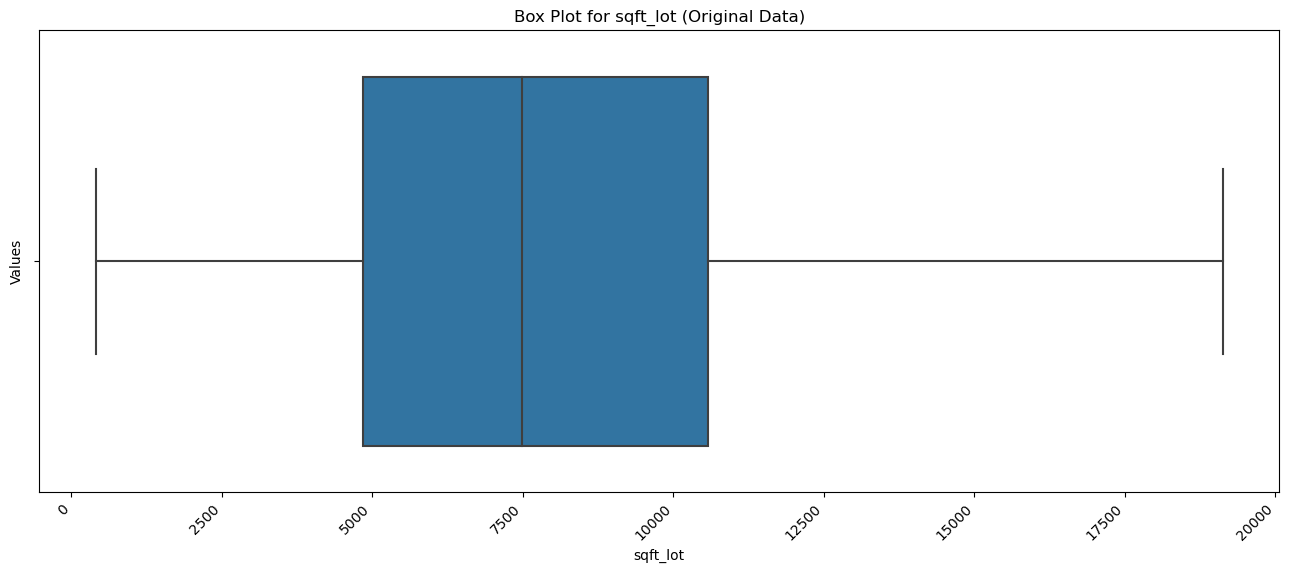

In [11]:
# Create a box plot for sqft_lot with actual values on the x-axis using the original DataFrame 
plt.figure(figsize=(16, 6))
sns.boxplot(x='sqft_lot', data=df_cleaned, width=0.8, showfliers=False)
plt.title('Box Plot for sqft_lot (Original Data)')
plt.xticks(rotation=45, ha='right')  
plt.xlabel('sqft_lot')
plt.ylabel('Values')

plt.show()



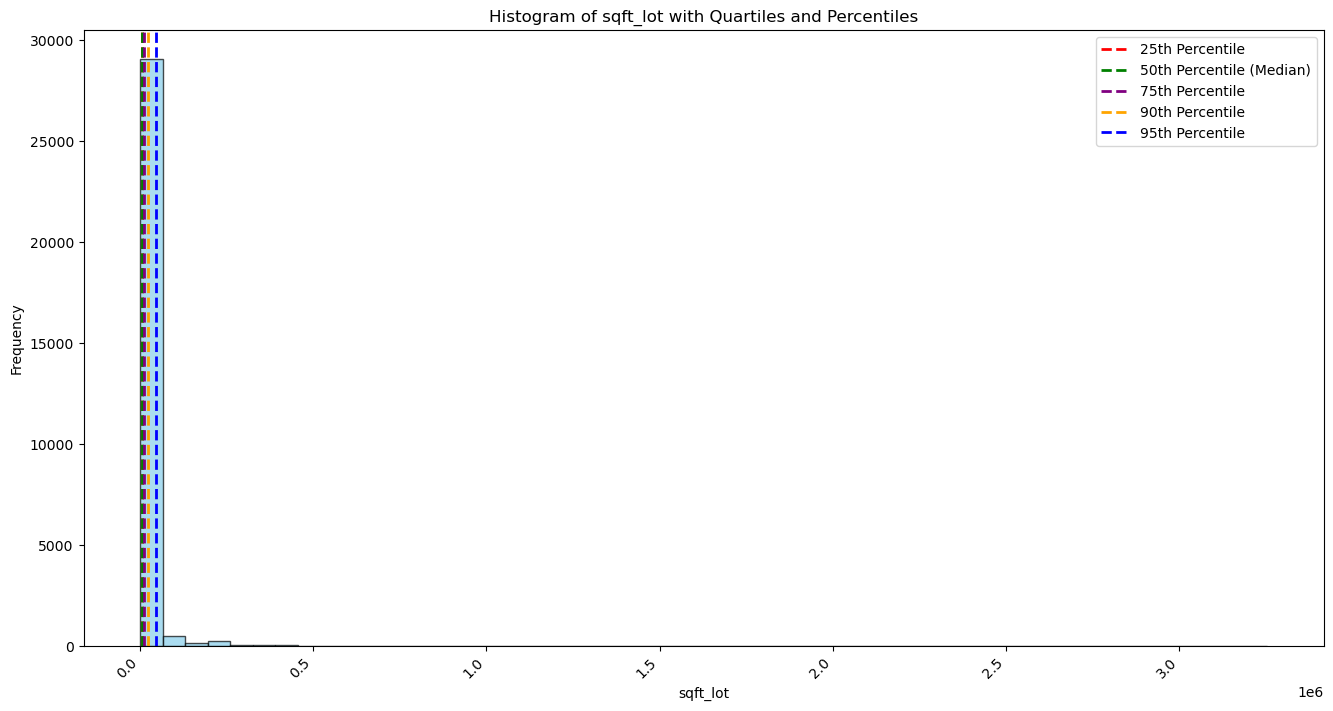

In [12]:
# Create a histogram for sqft_lot with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_cleaned['sqft_lot'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_cleaned['sqft_lot'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_cleaned['sqft_lot'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_cleaned['sqft_lot'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_cleaned['sqft_lot'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_cleaned['sqft_lot'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_lot with Quartiles and Percentiles')
plt.xlabel('sqft_lot')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



In [13]:
# Remove outliers for sqft_lot based on 1000 and 95th percentile
lower_limit = 1000
upper_limit = df_cleaned['sqft_lot'].quantile(0.95)

df_cleaned = df_cleaned[(df_cleaned['sqft_lot'] >= lower_limit) & (df_cleaned['sqft_lot'] <= upper_limit)]


In [14]:
# Print summary statistics of the original DataFrame for sqft_lot
print("df_cleaned Summary for Sqft_lot:")
print(df_cleaned['sqft_lot'].describe())




df_cleaned Summary for Sqft_lot:
count    27556.000000
mean      8988.076680
std       7212.953707
min       1000.000000
25%       5000.000000
50%       7398.000000
75%      10010.000000
max      45563.000000
Name: sqft_lot, dtype: float64


#### #2 Sqft_above

In [15]:
# Print summary statistics of the DataFrame
print("df_cleaned Summary for Sqft_above:")
print(df_cleaned['sqft_above'].describe())

#Viewing the bottom and top 10 values for sqft_above
bottom_10_sqft_above_values = df_cleaned['sqft_above'].nsmallest(10)
print(bottom_10_sqft_above_values)
top_10_sqft_above_values = df_cleaned['sqft_above'].nlargest(10)
print(top_10_sqft_above_values)




df_cleaned Summary for Sqft_above:
count    27556.000000
mean      1801.334011
std        838.736726
min        260.000000
25%       1190.000000
50%       1570.000000
75%       2260.000000
max       8882.000000
Name: sqft_above, dtype: float64
8694     260
8391     290
23622    290
12473    300
11989    310
476      320
11420    320
13015    320
29356    340
14598    350
Name: sqft_above, dtype: int64
20817    8882
635      8280
25561    8070
6936     7780
708      7627
14277    7590
29865    7400
22681    7240
27774    7140
2130     7020
Name: sqft_above, dtype: int64


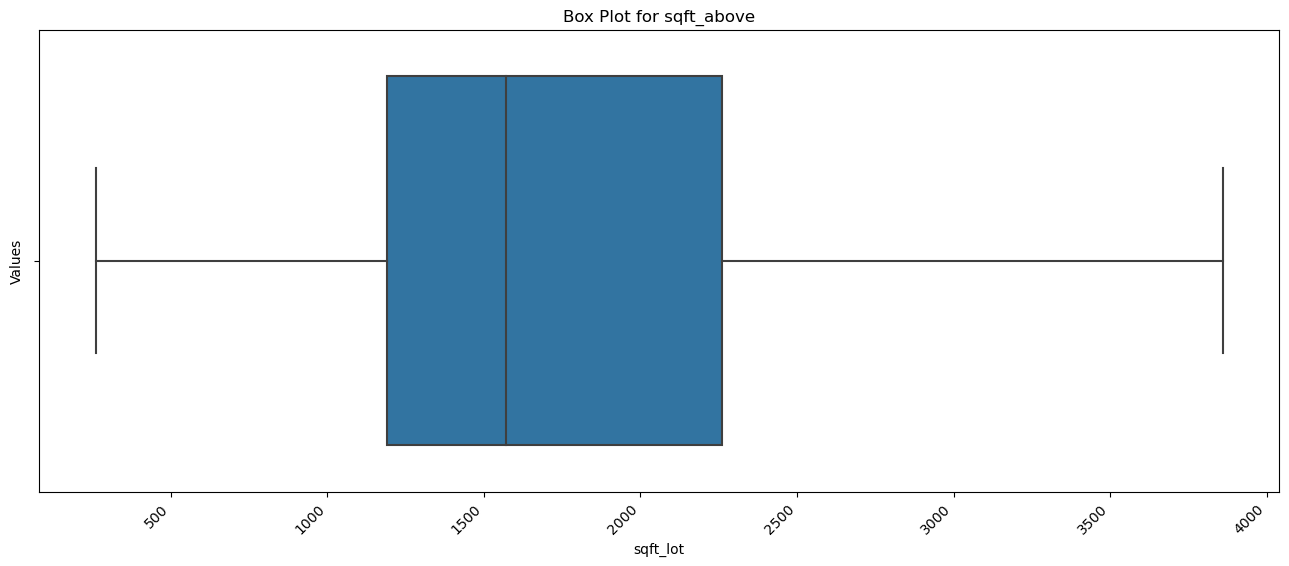

In [16]:
# Create a box plot for sqft_above with actual values on the x-axis using the DataFrame
plt.figure(figsize=(16, 6))
sns.boxplot(x='sqft_above', data=df_cleaned, width=0.8, showfliers=False)
plt.title('Box Plot for sqft_above')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel('sqft_lot')
plt.ylabel('Values')
plt.show()


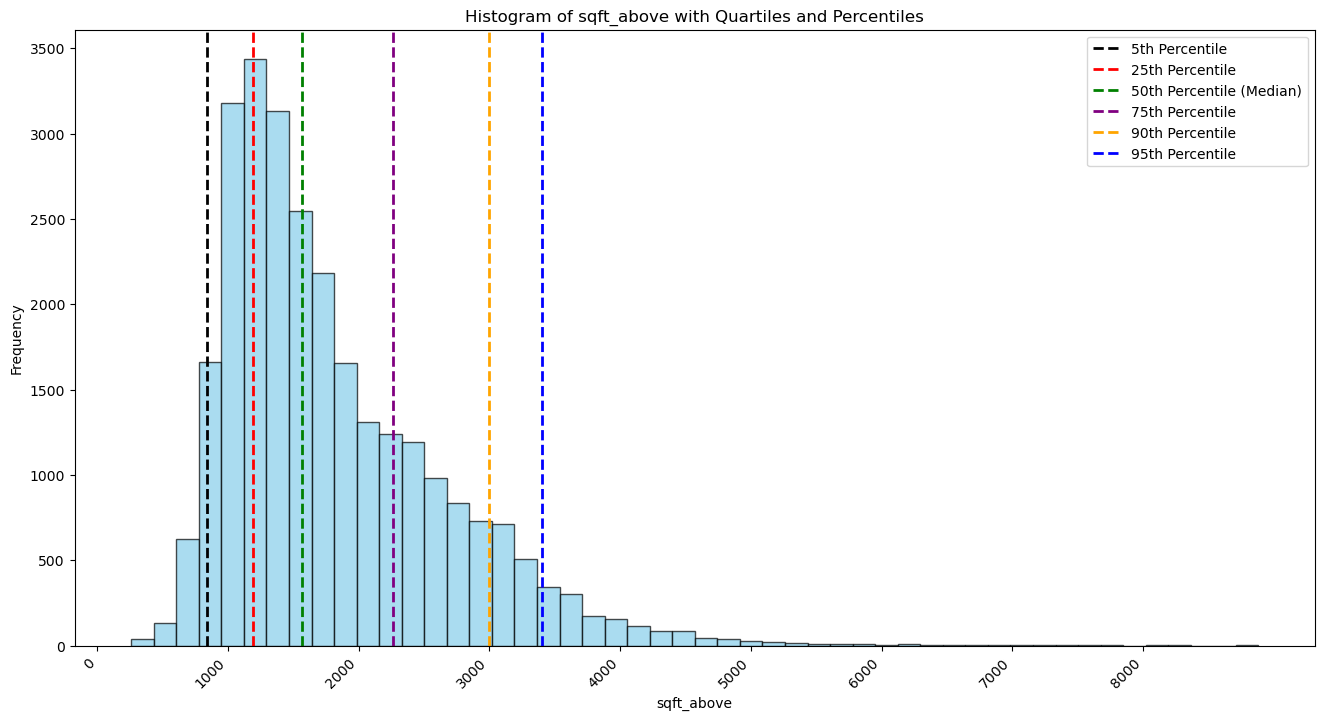

In [17]:
# Create a histogram for sqft_above with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_cleaned['sqft_above'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_cleaned['sqft_above'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_cleaned['sqft_above'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_cleaned['sqft_above'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_cleaned['sqft_above'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_cleaned['sqft_above'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_cleaned['sqft_above'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_above with Quartiles and Percentiles')
plt.xlabel('sqft_above')
plt.ylabel('Frequency')

plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()


In [18]:
# Remove outliers for sqft_above
lower_limit_sqft_above = 800
upper_limit_sqft_above = 3500

df_cleaned = df_cleaned[(df_cleaned['sqft_above'] >= lower_limit_sqft_above) & (df_cleaned['sqft_above'] <= upper_limit_sqft_above)]


In [19]:

# Print summary statistics of the filtered DataFrame
print("(sqft_above) Summary:")
print(df_cleaned['sqft_above'].describe())


(sqft_above) Summary:
count    25448.000000
mean      1735.243045
std        663.049182
min        800.000000
25%       1210.000000
50%       1560.000000
75%       2170.000000
max       3500.000000
Name: sqft_above, dtype: float64


#### #3 Sqft_basement

In [20]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df_cleaned['sqft_basement'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_basement = df_cleaned['sqft_basement'].value_counts().sort_index().head(10)
print(bottom_10_sqft_basement)

top_10_sqft_basement = df_cleaned['sqft_basement'].value_counts().sort_index().tail(10)
print(top_10_sqft_basement)
# Filter the DataFrame to exclude rows with outliers


Original DataFrame Summary:
count    25448.000000
mean       492.165082
std        568.083592
min          0.000000
25%          0.000000
50%          0.000000
75%        980.000000
max       3910.000000
Name: sqft_basement, dtype: float64
0      12827
60         1
70         1
80         7
100        7
110        7
120       10
130        4
140       10
150        7
Name: sqft_basement, dtype: int64
3090    1
3110    1
3180    1
3220    1
3500    1
3560    1
3590    1
3640    1
3710    1
3910    1
Name: sqft_basement, dtype: int64


In [21]:


# Filter out 0 values in the 'sqft_basement' column
non_zero_sqft_basement = df_cleaned[df_cleaned['sqft_basement'] > 0]['sqft_basement']

# Display the smallest and largest 10 unique non-zero values
smallest_10_non_zero_sqft_basement = np.sort(np.unique(non_zero_sqft_basement))[:10]
largest_10_non_zero_sqft_basement = np.sort(np.unique(non_zero_sqft_basement))[::-1][:10]

print("Smallest 10 unique non-zero sqft_basement values:")
print(smallest_10_non_zero_sqft_basement)

print("\nLargest 10 unique non-zero sqft_basement values:")
print(largest_10_non_zero_sqft_basement)



Smallest 10 unique non-zero sqft_basement values:
[ 60  70  80 100 110 120 130 140 150 160]

Largest 10 unique non-zero sqft_basement values:
[3910 3710 3640 3590 3560 3500 3220 3180 3110 3090]


#### Searching for outliers in sqft_basement without removing houses that do not have a basement.

In [22]:
# Create a DataFrame without 0 values in 'sqft_basement' for summary statistics
df_no_zeros = df_cleaned.query('sqft_basement > 0')

# Display summary statistics for 'sqft_basement' without 0 values
summary_no_zeros = df_no_zeros['sqft_basement'].describe()

# Print the summary statistics
print(summary_no_zeros)


count    12621.000000
mean       992.363283
std        392.827802
min         60.000000
25%        720.000000
50%        980.000000
75%       1220.000000
max       3910.000000
Name: sqft_basement, dtype: float64


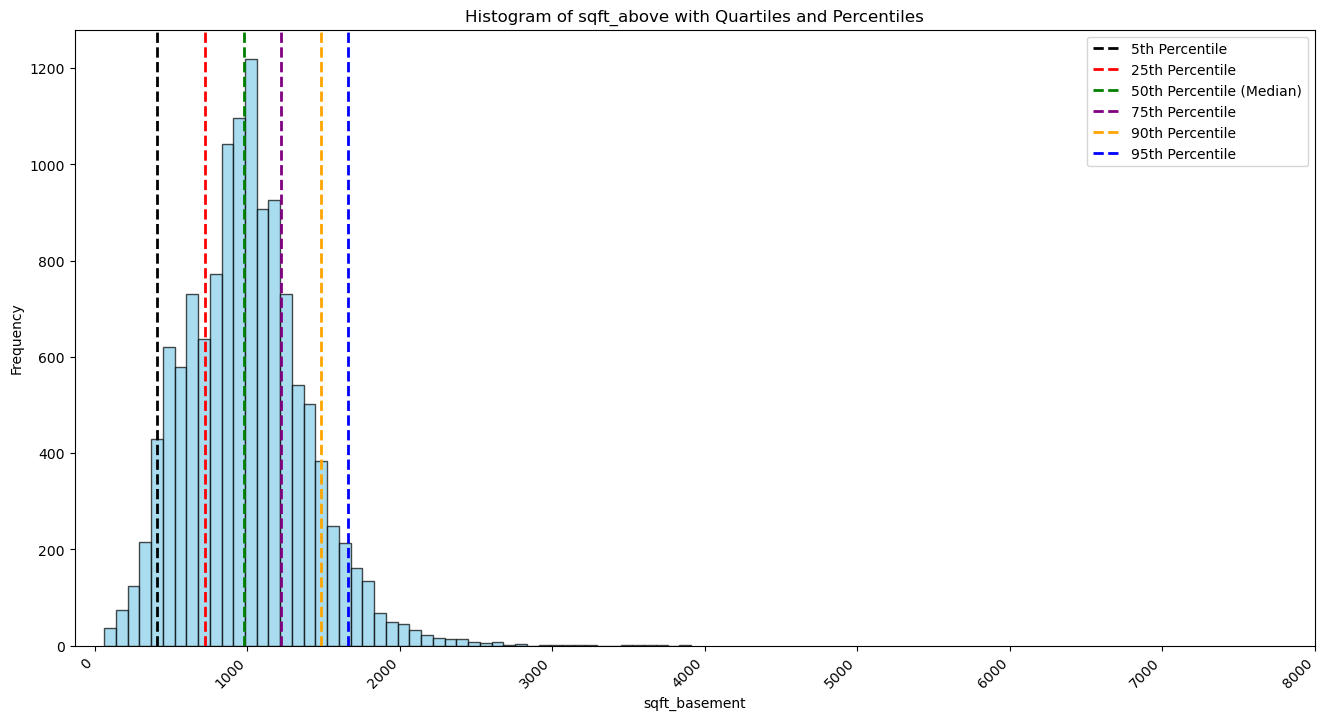

In [23]:
# Create a histogram for sqft_basement with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_no_zeros['sqft_basement'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_above with Quartiles and Percentiles')
plt.xlabel('sqft_basement')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()


In [24]:
# Remove outliers for 'sqft_basement' excluding 0 values
lower_limit_sqft_basement = 400
upper_limit_sqft_basement = 2000

df_cleaned = df_cleaned[(df_cleaned['sqft_basement'] >= lower_limit_sqft_basement) | (df_cleaned['sqft_basement'] == 0) & (df_cleaned['sqft_basement'] <= upper_limit_sqft_basement)]

# Display summary statistics for 'sqft_basement' in the filtered DataFrame
summary_df_cleaned = df_cleaned['sqft_basement'].describe()

# Print the summary statistics for 'sqft_basement' in the filtered DataFrame
print(summary_df_cleaned)


count    24904.000000
mean       496.620784
std        573.316062
min          0.000000
25%          0.000000
50%          0.000000
75%        990.000000
max       3910.000000
Name: sqft_basement, dtype: float64


In [25]:
# Display the bottom 10 values for sqft_basement
bottom_10_sqft_basement = df_cleaned['sqft_basement'].value_counts().sort_index().head(10)
print(bottom_10_sqft_basement)

0      12827
400       55
404        1
410       37
416        1
417        1
420       76
429        1
430       74
440       88
Name: sqft_basement, dtype: int64


#### #4 Sqft_garage

In [26]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df_cleaned['sqft_garage'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_garage = df_cleaned['sqft_garage'].value_counts().sort_index().head(10)
print(bottom_10_sqft_garage)

top_10_sqft_garage = df_cleaned['sqft_garage'].value_counts().sort_index().tail(10)
print(top_10_sqft_garage)
# Filter the DataFrame to exclude rows with outliers


Original DataFrame Summary:
count    24904.000000
mean       329.918487
std        256.723560
min          0.000000
25%          0.000000
50%        400.000000
75%        500.000000
max       2840.000000
Name: sqft_garage, dtype: float64
0      7462
40        1
70        2
80        5
90        2
100       3
110       5
120       4
130       9
140      14
Name: sqft_garage, dtype: int64
1560    1
1590    1
1660    1
1670    1
1740    1
1788    1
1840    1
2030    1
2240    1
2840    1
Name: sqft_garage, dtype: int64


In [27]:


# Filter out 0 values in the 'sqft_garage' column
non_zero_sqft_garage = df_cleaned[df_cleaned['sqft_garage'] > 0]['sqft_garage']

# Display the smallest and largest 10 unique non-zero values
smallest_10_non_zero_sqft_garage = np.sort(np.unique(non_zero_sqft_garage))[:10]
largest_10_non_zero_sqft_garage = np.sort(np.unique(non_zero_sqft_garage))[::-1][:10]

print("Smallest 10 unique non-zero sqft_garage values:")
print(smallest_10_non_zero_sqft_garage)

print("\nLargest 10 unique non-zero sqft_garage values:")
print(largest_10_non_zero_sqft_garage)


Smallest 10 unique non-zero sqft_garage values:
[ 40  70  80  90 100 110 120 130 140 145]

Largest 10 unique non-zero sqft_garage values:
[2840 2240 2030 1840 1788 1740 1670 1660 1590 1560]


#### Searching for outliers in sqft_garage without removing houses that do not have a garage.

In [28]:
# Create a DataFrame without 0 values in 'sqft_garage' for summary statistics
df_no_zerosg = df_cleaned.query('sqft_garage > 0')

# Display summary statistics for 'sqft_garage' without 0 values
summary_no_zerosg = df_no_zerosg['sqft_garage'].describe()

# Print the summary statistics
print(summary_no_zerosg)


count    17442.000000
mean       471.063525
std        166.170699
min         40.000000
25%        390.000000
50%        460.000000
75%        550.000000
max       2840.000000
Name: sqft_garage, dtype: float64


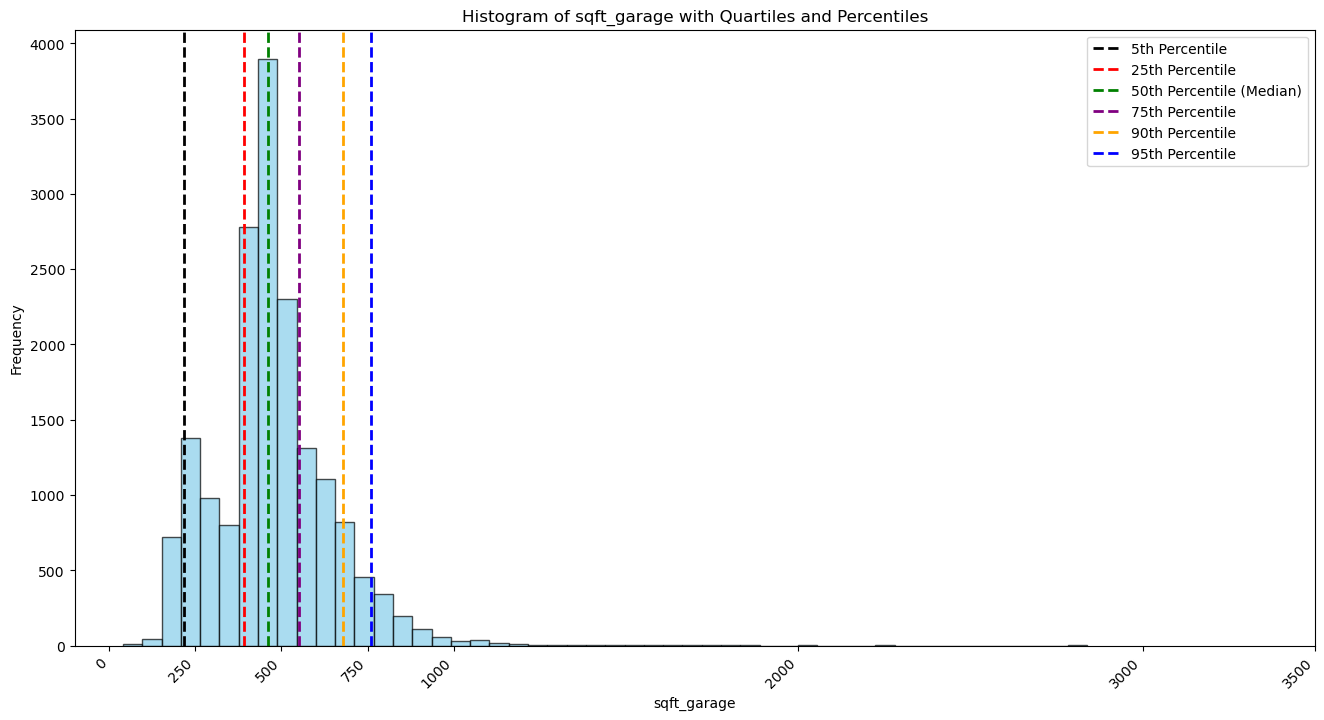

In [29]:
# Create a histogram for sqft_basement with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_no_zerosg['sqft_garage'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_garage with Quartiles and Percentiles')
plt.xlabel('sqft_garage')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 250, 500, 750, 1000, 2000, 3000, 3500]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()



In [30]:
# Remove outliers for 'sqft_garage' excluding 0 values
lower_limit_sqft_garage = 200
upper_limit_sqft_garage = 800

df_cleaned = df_cleaned[(df_cleaned['sqft_garage'] >= lower_limit_sqft_garage) | ((df_cleaned['sqft_garage'] == 0) | (df_cleaned['sqft_garage'] <= upper_limit_sqft_garage))]

# Display summary statistics for 'sqft_garage' in the filtered DataFrame
summary_df_cleaned = df_cleaned['sqft_garage'].describe()

# Print the summary statistics for 'sqft_garage' in the filtered DataFrame
print(summary_df_cleaned)


count    24904.000000
mean       329.918487
std        256.723560
min          0.000000
25%          0.000000
50%        400.000000
75%        500.000000
max       2840.000000
Name: sqft_garage, dtype: float64


#### #5 Sqft_patio

In [31]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df_cleaned['sqft_patio'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_patio = df_cleaned['sqft_patio'].value_counts().sort_index().head(10)
print(bottom_10_sqft_patio)

top_10_sqft_patio = df_cleaned['sqft_patio'].value_counts().sort_index().tail(10)
print(top_10_sqft_patio)
# Filter the DataFrame to exclude rows with outliers

Original DataFrame Summary:
count    24904.000000
mean       199.890218
std        219.753121
min          0.000000
25%         40.000000
50%        140.000000
75%        290.000000
max       2210.000000
Name: sqft_patio, dtype: float64
0     5772
8        1
10      16
12       1
15       4
18       1
20      97
22       1
24       3
25       5
Name: sqft_patio, dtype: int64
1700    1
1750    1
1810    1
1860    1
1870    1
1900    1
2000    1
2030    1
2040    1
2210    1
Name: sqft_patio, dtype: int64


#### Searching for outliers in sqft_patio without removing houses that do not have a patio.

In [32]:
# Create a DataFrame without 0 values in 'sqft_patio' for summary statistics
df_no_zerosp = df_cleaned.query('sqft_patio > 0')

# Display summary statistics for 'sqft_patio' without 0 values
summary_no_zerosp = df_no_zerosp['sqft_patio'].describe()

# Print the summary statistics
print(summary_no_zerosp)


count    19132.000000
mean       260.195798
std        217.185011
min          8.000000
25%        100.000000
50%        200.000000
75%        350.000000
max       2210.000000
Name: sqft_patio, dtype: float64


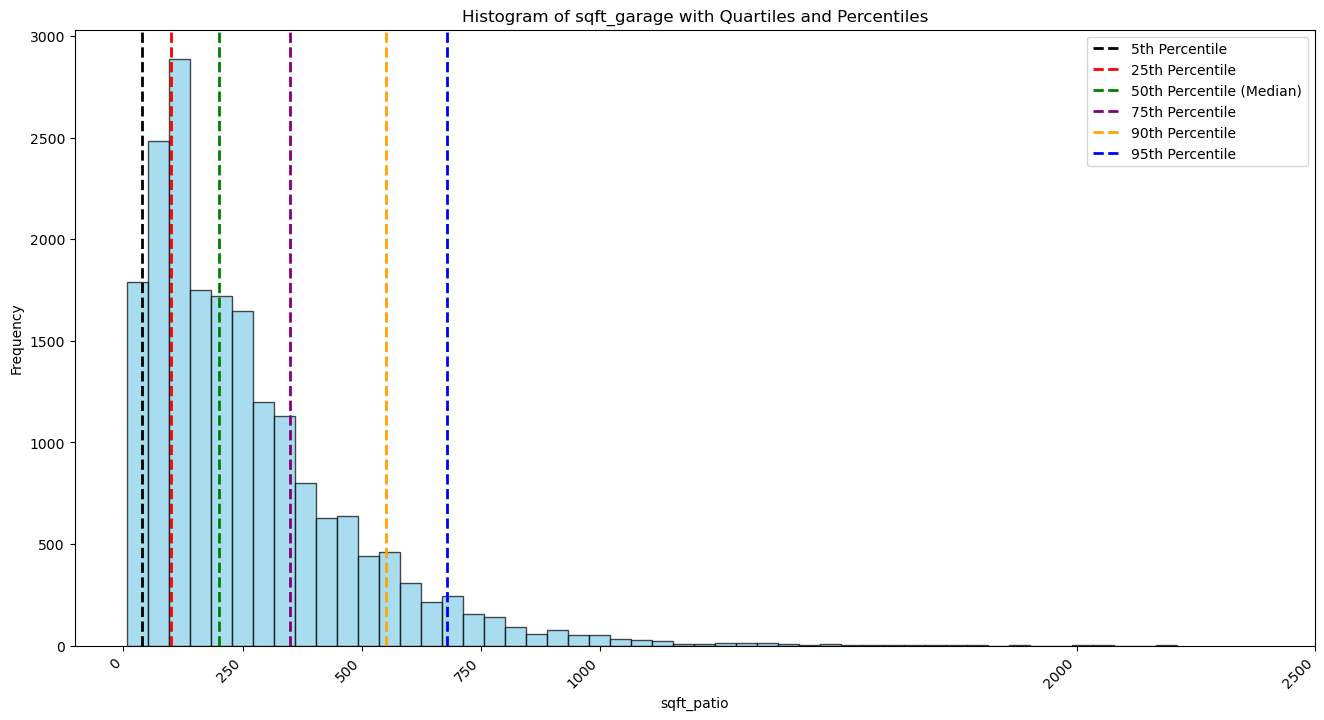

In [33]:
# Create a histogram for sqft_patio with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_no_zerosp['sqft_patio'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_no_zerosp['sqft_patio'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_garage with Quartiles and Percentiles')
plt.xlabel('sqft_patio')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 250, 500, 750, 1000, 2000, 2500]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()


In [34]:
# Remove outliers for 'sqft_patio' excluding 0 values
lower_limit_sqft_patio = 40
upper_limit_sqft_patio = 750

df_cleaned = df_cleaned[(df_cleaned['sqft_patio'] >= lower_limit_sqft_patio) | ((df_cleaned['sqft_patio'] == 0) | (df_cleaned['sqft_patio'] <= upper_limit_sqft_patio))]

# Display summary statistics for 'sqft_patio' in the filtered DataFrame
summary_df_cleaned = df_cleaned['sqft_patio'].describe()

# Print the summary statistics for 'sqft_patio' in the filtered DataFrame
print(summary_df_cleaned)


count    24904.000000
mean       199.890218
std        219.753121
min          0.000000
25%         40.000000
50%        140.000000
75%        290.000000
max       2210.000000
Name: sqft_patio, dtype: float64


#### Creating a box plot to visualize sqft_patio data after removing outliers.

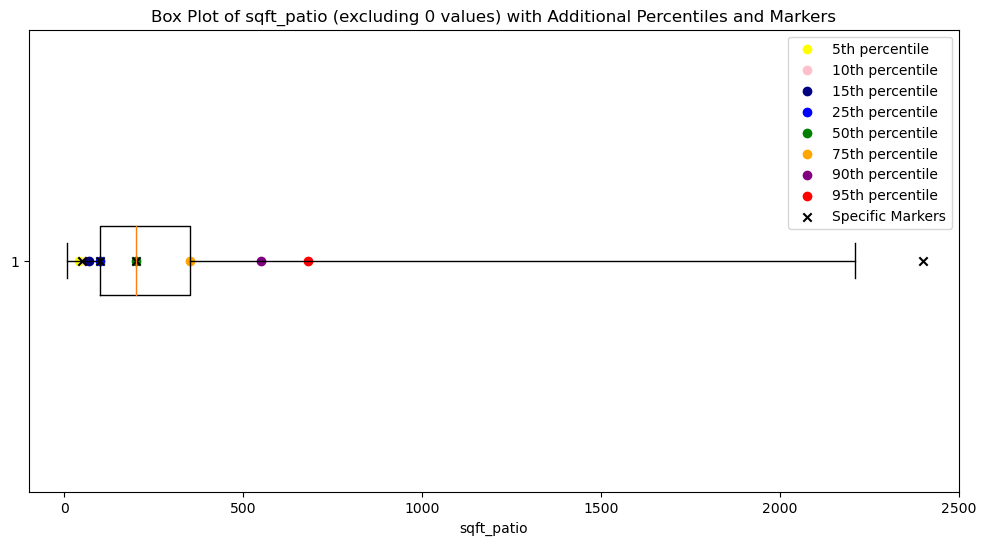

In [35]:

# Create a box plot for 'sqft_patio' without 0 values with additional percentiles
percentiles = [5, 10, 15, 25, 50, 75, 90, 95]

plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(df_no_zerosp['sqft_patio'], vert=False, whis=(0, 100))

# Calculate and plot custom percentiles with different colors
colors = ['yellow', 'pink', 'navy', 'blue', 'green', 'orange', 'purple', 'red']
percentile_values = np.percentile(df_no_zerosp['sqft_patio'], percentiles)

for i, (percentile, color) in enumerate(zip(percentiles, colors)):
    plt.scatter(percentile_values[i], 1, marker='o', color=color, label=f'{percentile}th percentile')

# Set x-axis limits
plt.xlim(-100, 2500)

# Add specific markers for 50, 100, 200-2400
plt.scatter([50, 100, 200, 2400], [1, 1, 1, 1], marker='x', color='black', label='Specific Markers')

plt.title('Box Plot of sqft_patio (excluding 0 values) with Additional Percentiles and Markers')
plt.xlabel('sqft_patio')
plt.legend()
plt.show()


# Searching for outliers for bedrooms, bathrooms, sqft_living and floors.

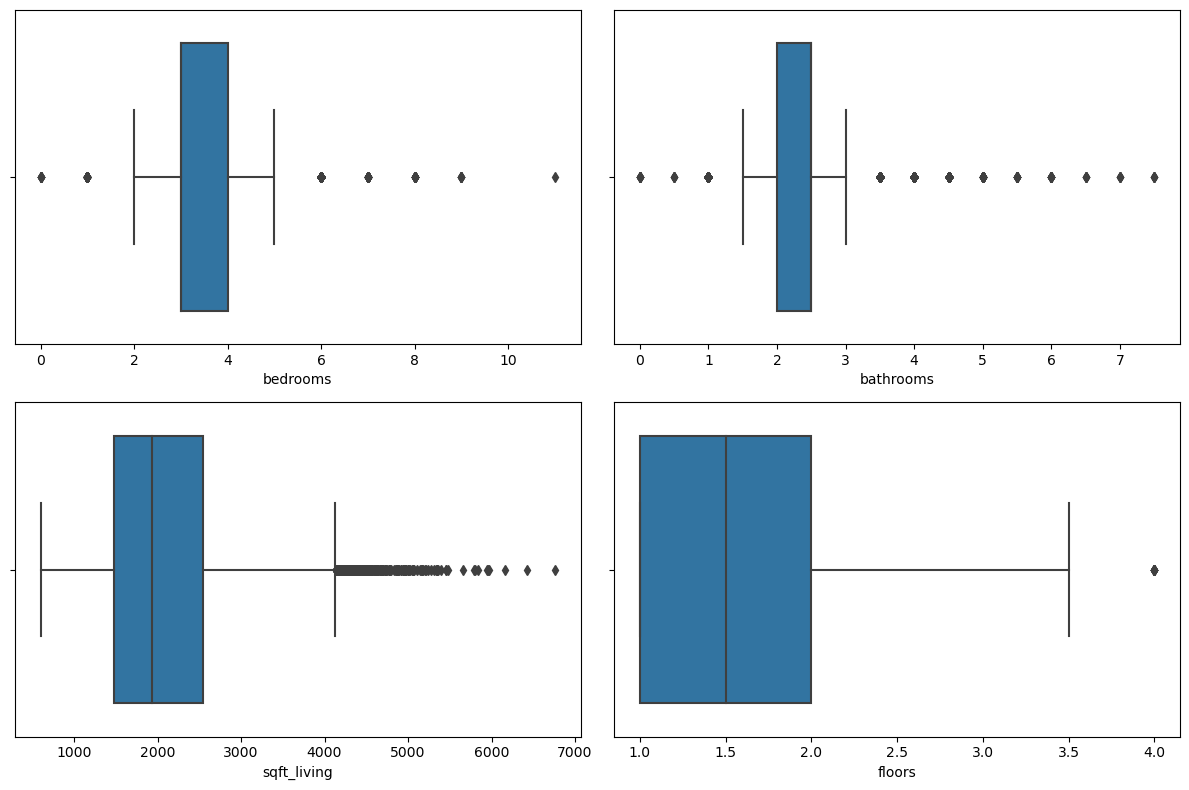

In [36]:
variables_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create individual box plots for each variable
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=variable, data=df_cleaned)

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


In [37]:
bottom_10_sqft_living = df_cleaned.nsmallest(10, 'sqft_living')
print(bottom_10_sqft_living[['sqft_living']])



       sqft_living
873            600
11173          620
2987           750
18094          750
370            800
1219           800
1795           800
2199           800
2627           800
3175           800


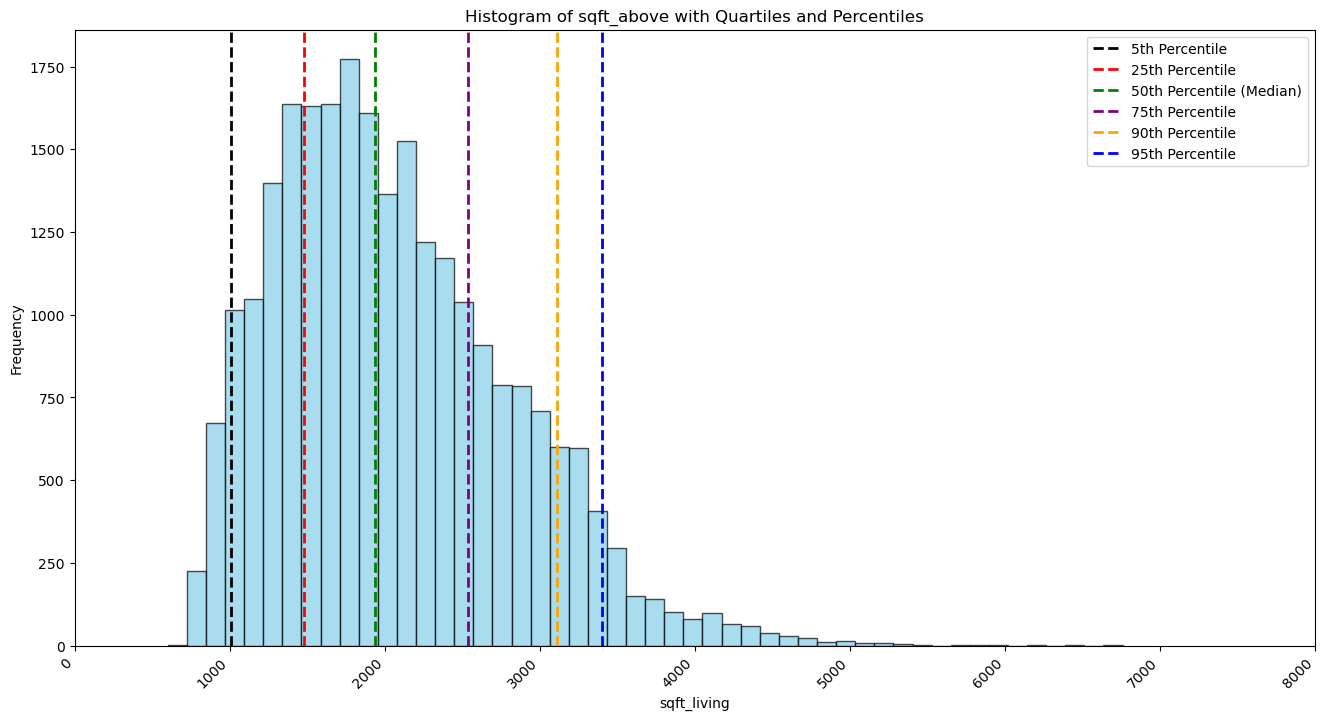

In [38]:
# Create a histogram for sqft_living with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_cleaned['sqft_living'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_cleaned['sqft_living'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_cleaned['sqft_living'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')
plt.title('Histogram of sqft_above with Quartiles and Percentiles')
plt.xlabel('sqft_living')
plt.ylabel('Frequency')

plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()

In [39]:
# Remove outliers for sqft_living
lower_limit_sqft_living = 800
upper_limit_sqft_living = 3500

df_cleaned = df_cleaned[(df_cleaned['sqft_living'] >= lower_limit_sqft_living) & (df_cleaned['sqft_living'] <= upper_limit_sqft_living)]

In [40]:
# Display the bottom 10 values for bedrooms
bottom_10_bedrooms = df_cleaned.sort_values(by='bedrooms').head(10)
print(bottom_10_bedrooms[['bedrooms']])


       bedrooms
8338          0
7545          0
16521         0
1952          0
11471         0
573           0
27540         0
29574         0
1310          0
1289          0


In [41]:
#Display unique values to verify the changes
print(df_cleaned['bedrooms'].unique())

[ 4  5  6  3  2  1  0  7  8  9 11]


In [42]:
#Remove homes with less than 1 bedroom
df_cleaned = df_cleaned[df_cleaned['bedrooms'] != 0]
#Display unique values to verify the changes
print(df_cleaned['bedrooms'].unique())

[ 4  5  6  3  2  1  7  8  9 11]


In [43]:
#Display unique values to verify the changes
print(df_cleaned['bathrooms'].unique())

[1.  2.5 2.  3.  1.5 3.5 4.  5.5 5.  4.5 6.  7.5 6.5 0.5 0.  7. ]


In [44]:
df_cleaned = df_cleaned[(df_cleaned['bathrooms'] != 0) & (df_cleaned['bathrooms'] != 0.5)]
# Display unique values to verify the changes
print(df_cleaned['bathrooms'].unique())


[1.  2.5 2.  3.  1.5 3.5 4.  5.5 5.  4.5 6.  7.5 6.5 7. ]


In [45]:
#Display unique values to verify the changes
print(df_cleaned['floors'].unique())

[1.  2.  1.5 3.  2.5 4.  3.5]


In [46]:
#descriptive statistics
df_cleaned.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,renovation_status_No Renovation,renovation_status_Renovation,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,nuisance_NO,nuisance_YES,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
count,2.396000e+04,2.396000e+04,23960.00000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.0,23960.0,23960.0,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000,23960.000000
mean,4.666454e+09,9.899133e+05,3.42884,2.248957,1984.127671,8771.801711,1.482513,1704.453631,457.975000,324.132387,190.796953,1972.937396,86.898038,47.422514,-121.739358,0.591611,0.006636,0.284808,0.001377,0.115568,0.184307,0.001795,0.706928,0.002713,0.103798,0.000167,0.000292,0.956511,0.043489,0.022955,0.002129,0.000167,0.0,0.0,0.0,0.000250,0.006469,0.088940,0.444908,0.325876,0.108306,0.835518,0.164482,0.111269,0.000083,0.888564,0.000083
std,2.878413e+09,5.589047e+05,0.85700,0.736056,659.807411,6928.357060,0.526547,640.294497,539.519046,253.211591,210.568577,30.792909,407.561324,1.069996,4.170782,0.491546,0.081193,0.451332,0.037087,0.319712,0.387743,0.042326,0.455181,0.052015,0.305005,0.012920,0.017090,0.203960,0.203960,0.149763,0.046088,0.012920,0.0,0.0,0.0,0.015823,0.080172,0.284663,0.496966,0.468711,0.310772,0.370721,0.370721,0.314471,0.009136,0.314678,0.009136
min,1.000055e+06,2.756300e+04,1.00000,1.000000,800.000000,1000.000000,1.000000,800.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,25.847715,-147.337806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.212900e+09,6.330000e+05,3.00000,2.000000,1469.500000,5000.000000,1.000000,1200.000000,0.000000,0.000000,30.000000,1953.000000,0.000000,47.398228,-122.326698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.022900e+09,8.440000e+05,3.00000,2.500000,1900.000000,7356.500000,1.500000,1540.000000,0.000000,400.000000,130.000000,1975.000000,0.000000,47.547236,-122.234310,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.349640e+09,1.215062e+06,4.00000,2.500000,2450.000000,9830.500000,2.000000,2107.750000,950.000000,500.000000,280.000000,1999.000000,0.000000,47.671712,-122.132748,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.904000e+09,9.500

# Removal of Unnecessary Columns 

#### This model removes variables that are out of homeowners' control, including: address, latitude, longitude, date, year built, year renovated, greenbelt, view and waterfront. 
#### Removing this data provides homeowners a clearer understanding of variables that contribute to increasing property value.

In [47]:
# List of columns to remove
columns_to_remove = ['address','lat', 'long','date','yr_built', 'yr_renovated', 'greenbelt', 'view','waterfront']

# Drop the columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_remove)

# Display the first few rows of the resulting DataFrame
print(df_cleaned.head())

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7399300360  675000.0         4        1.0         1180      7140     1.0   
1  8910500230  920000.0         5        2.5         2770      6703     1.0   
2  1180000275  311000.0         6        2.0         2880      6156     1.0   
3  1604601802  775000.0         3        3.0         2160      1400     2.0   
5  2807100156  625000.0         2        1.0         1190      5688     1.0   

   sqft_above  sqft_basement  sqft_garage  sqft_patio  condition_Average  \
0        1180              0            0          40                  0   
1        1570           1570            0         240                  1   
2        1580           1580            0           0                  1   
3        1090           1070          200         270                  1   
5        1190              0          300           0                  1   

   condition_Fair  condition_Good  condition_Poor  condition_Very Go

# Using StatsModels for Multiple Linear Regression

In [48]:
# Price is the target variable
target_variable = 'price'

# Create predictors
predictors = df_cleaned.drop([target_variable], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors)

# Fit multiple linear regression model to data
model = sm.OLS(df_cleaned[target_variable], predictors_int).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     455.3
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:41:45   Log-Likelihood:            -3.4524e+05
No. Observations:               23960   AIC:                         6.905e+05
Df Residuals:                   23926   BIC:                         6.908e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Results from multiple linear regression model
#### R-Squared = 0.386 -indicates this model explains about 39% of the variance of price
#### P-Values - each p value is teting the null hypothesis of each coefficent is equal to zero. P values <.05 are significant
#### Coefficents- Represent the estimated change in price for a one-unit change in the corresponding predictor variable. (hold all other variables constant)


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions using the model
predictions = model.predict(predictors_int)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df_cleaned[target_variable], predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(df_cleaned[target_variable], predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 289312.846205468
Root Mean Squared Error (RMSE): 438022.16555272596


In [50]:
# view model coefficients
model.params


const                              3.923079e+05
id                                -2.033897e-06
bedrooms                          -2.951557e+04
bathrooms                          2.593508e+04
sqft_living                        7.363872e+01
sqft_lot                           5.441940e+00
floors                            -5.044697e+04
sqft_above                         1.794791e+02
sqft_basement                      1.692677e+02
sqft_garage                       -2.781672e+02
sqft_patio                         9.777511e+01
condition_Average                  6.526761e+04
condition_Fair                     7.017576e+04
condition_Good                     1.573630e+05
condition_Poor                    -1.374132e+05
condition_Very Good                2.369147e+05
heat_source_Electricity           -3.501583e+04
heat_source_Electricity/Solar     -6.638899e+04
heat_source_Gas                   -3.136873e+03
heat_source_Gas/Solar              9.502392e+04
heat_source_Oil                    2.645

# Creation of Tornado Chart
#### Visual representation of the impact of each coefficent on the dependt variable (price)

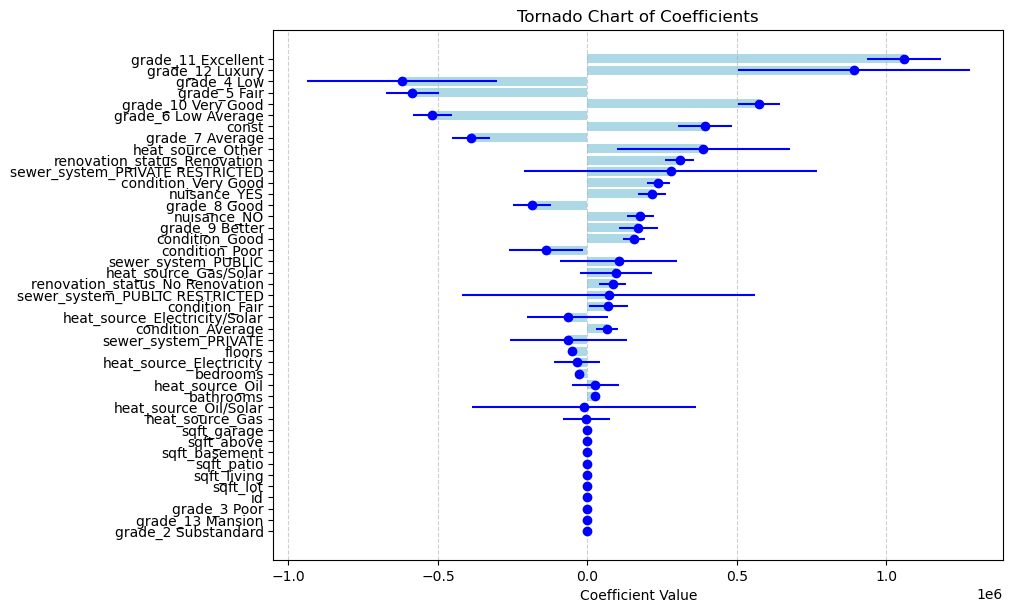

In [51]:

# Extract the coefficients and their standard errors from the regression summary
coefficients = model.params
standard_errors = model.bse

# Calculate the lower and upper bounds for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors

# Sort the coefficients based on their impact on the dependent variable
sorted_indices = np.argsort(np.abs(coefficients))

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), coefficients.index[sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust spacing between the y-axis labels
plt.tight_layout(pad=0.25)
plt.show()


# Working with Only Statistically Significant Data
## Data with p values <.05

In [52]:
# Filter coefficients based on p-values
significant_vars = model.params[model.pvalues < 0.05]

# Display coefficients of significant variables
print(significant_vars)


const                              3.923079e+05
id                                -2.033897e-06
bedrooms                          -2.951557e+04
bathrooms                          2.593508e+04
sqft_living                        7.363872e+01
sqft_lot                           5.441940e+00
floors                            -5.044697e+04
sqft_above                         1.794791e+02
sqft_basement                      1.692677e+02
sqft_garage                       -2.781672e+02
sqft_patio                         9.777511e+01
condition_Average                  6.526761e+04
condition_Fair                     7.017576e+04
condition_Good                     1.573630e+05
condition_Poor                    -1.374132e+05
condition_Very Good                2.369147e+05
heat_source_Other                  3.878485e+05
renovation_status_No Renovation    8.424272e+04
renovation_status_Renovation       3.080652e+05
grade_10 Very Good                 5.737559e+05
grade_11 Excellent                 1.057

In [53]:
# Ensure 'const' is in the index of significant_vars
if 'const' not in significant_vars.index:
    significant_vars.loc['const'] = 0  

# List of significant variable names (including 'const')
significant_vars_names = significant_vars.index.tolist()

# Check if 'const' is in df_cleaned columns
if 'const' not in df_cleaned.columns:
    # If not, add 'const' to the DataFrame
    df_cleaned['const'] = 1

# Create predictors using only statistically significant variables
significant_vars_data = df_cleaned[significant_vars_names]

# Fit multiple linear regression model to data using only significant variables
model_significant = sm.OLS(df_cleaned[target_variable], significant_vars_data).fit()

# Print model summary
print(model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     582.9
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:41:46   Log-Likelihood:            -3.4538e+05
No. Observations:               23960   AIC:                         6.908e+05
Df Residuals:                   23934   BIC:                         6.910e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

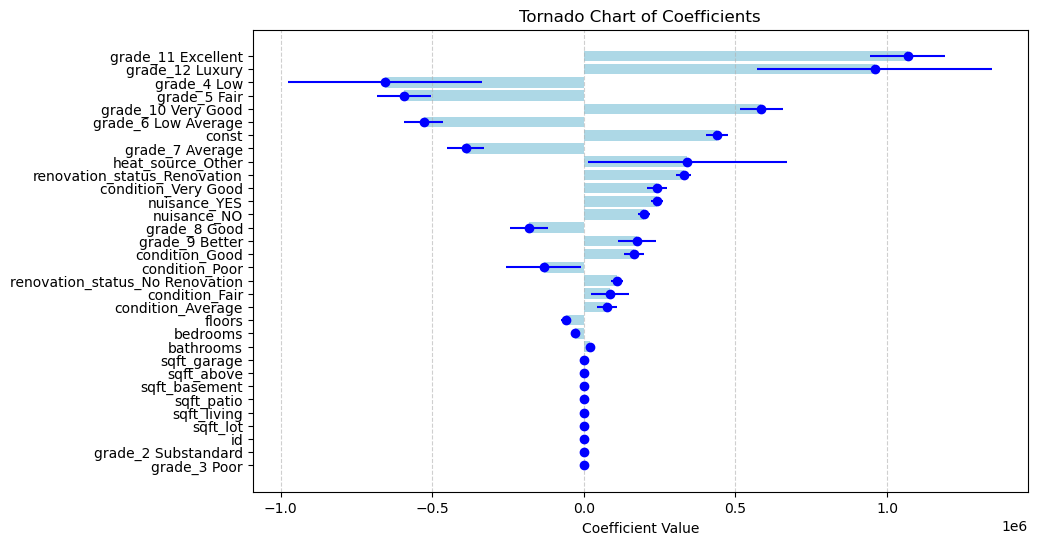

In [54]:
# Extract the coefficients and their standard errors from the regression summary
coefficients = model_significant.params
standard_errors = model_significant.bse

# Calculate the lower and upper bounds for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors

# Sort the coefficients based on their impact on the dependent variable
sorted_indices = np.argsort(np.abs(coefficients))

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), coefficients.index[sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

plt.show()


In [55]:
# return the standard error for 
# all coefficients in the equation
model_significant.bse

const                              1.798370e+04
id                                 9.954656e-07
bedrooms                           4.340308e+03
bathrooms                          6.044847e+03
sqft_living                        1.446003e+01
sqft_lot                           4.689225e-01
floors                             8.041735e+03
sqft_above                         1.466451e+01
sqft_basement                      9.826942e+00
sqft_garage                        1.404108e+01
sqft_patio                         1.478077e+01
condition_Average                  1.634403e+04
condition_Fair                     3.215341e+04
condition_Good                     1.654644e+04
condition_Poor                     6.328096e+04
condition_Very Good                1.740800e+04
heat_source_Other                  1.668492e+05
renovation_status_No Renovation    1.052154e+04
renovation_status_Renovation       1.239439e+04
grade_10 Very Good                 3.594305e+04
grade_11 Excellent                 6.352

## Mean Absolute Error (MAE)
#### This metric tests the accuracy of a regression model. 
#### It measures the absolute difference between the predicted and actual values. 

In [56]:
predicted_price = model_significant.predict(significant_vars_data)
mae = mean_absolute_error(df_cleaned['price'], predicted_price)

print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 290703.2632863997


## Root Mean Squared Error for Residual (RMSE)

#### This metric asses the goodness of fit of a regression model by examining the errors of residuals. 
#### Residuals are the diffrences between observed values and perdicted values of the model.

In [57]:
rmse_residuals = np.sqrt(model_significant.mse_resid)

# View Root Mean Squared Error for residuals
print(f'Root Mean Squared Error for Residuals: {rmse_residuals}')


Root Mean Squared Error for Residuals: 440870.4505069089


## Homoscedasticity
#### The assumption that the variance of the residual is constant across all levels of the independent variable.

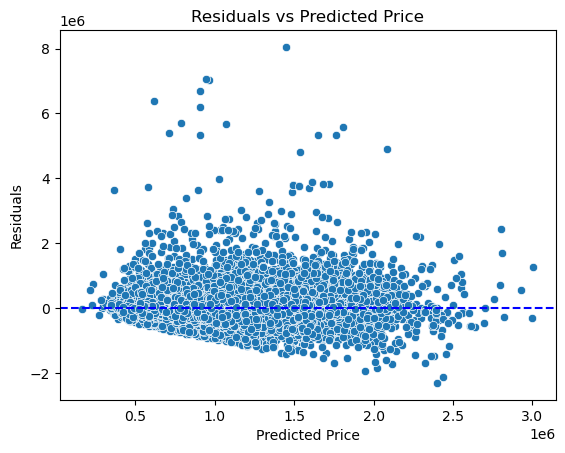

In [58]:
#Checking for Homoscedasticity

y_pred = model_significant.predict(significant_vars_data)  # Replace with your actual predicted values
residuals = df_cleaned['price'] - y_pred  # Calculate residuals

# Create a DataFrame with predicted values and residuals
residuals_df = pd.DataFrame({'Predicted Price': y_pred, 'Residuals': residuals})

# Plot residuals against predicted values
p = sns.scatterplot(x='Predicted Price', y='Residuals', data=residuals_df)
plt.axhline(y=0, color='blue', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()


#### The chart remains close to constant (0) indicating homoscedasticity

## Goldfield-Quandt test'
#### Checks for the hetroscedasticity in the residuals 

In [59]:

# Goldfield-Quandt test'
# Checks for heteroscedasticity in the residuals

test = sms.het_goldfeldquandt(residuals, predictors_int)
name = ['F statistic', 'p-value']

# Display the results
list(zip(name, test))



[('F statistic', 0.9917955379822169), ('p-value', 0.6737218264830364)]

#### The test result indicates that there is no signifanct evidence of heteroscdasticity in the residuals. 

#### Pvalue is >.05 we cannot reject the null, and we can inccur that our residuals are homscatstic

# Visualization of Residuals from Model

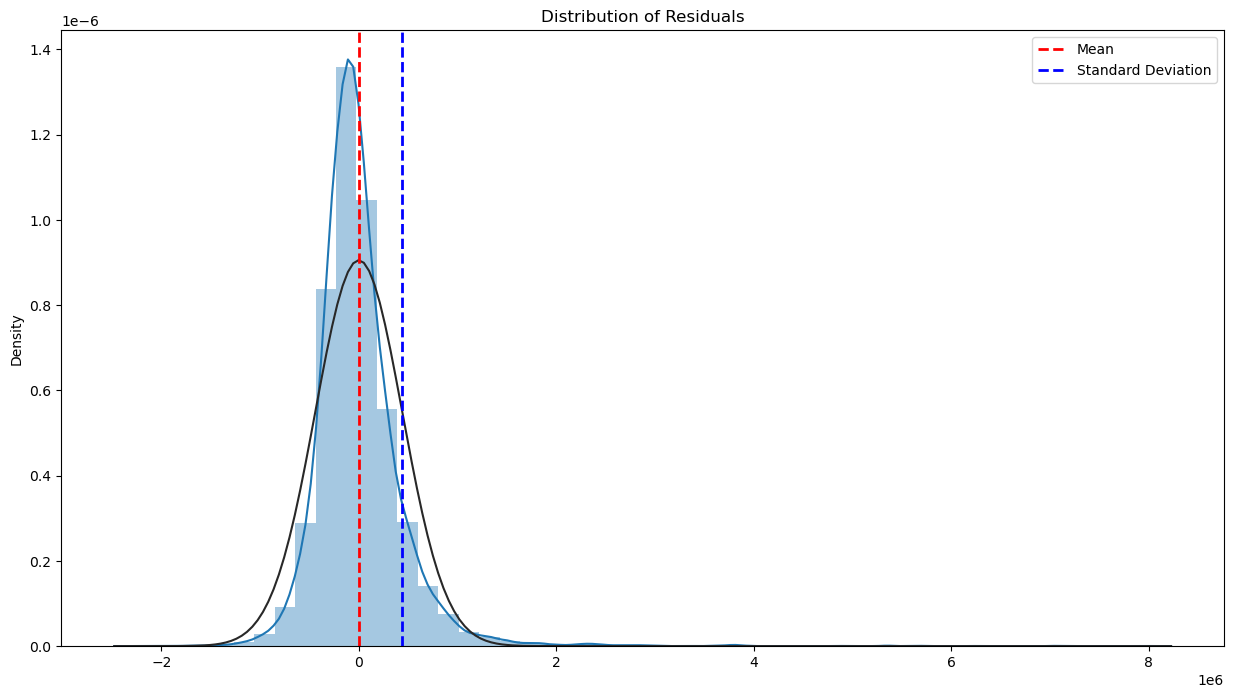

In [81]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

residuals = df_cleaned['price'] - y_pred  

# Set a larger figure size
plt.figure(figsize=(15, 8))

# Plot the distribution of residuals
p = sns.distplot(residuals, fit=norm, kde=True)
p = plt.title('Distribution of Residuals')

#  Add a line to represent a normal distribution
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(residuals.std(), color='blue', linestyle='dashed', linewidth=2, label='Standard Deviation')

# Show legend
plt.legend()

# Show the plot
plt.show()


#### Mean line = red dash
#### Std line = blue dash
#### Normal distrubution fit= blue curved line

-4.598692818257168e-05 440631.1820793833


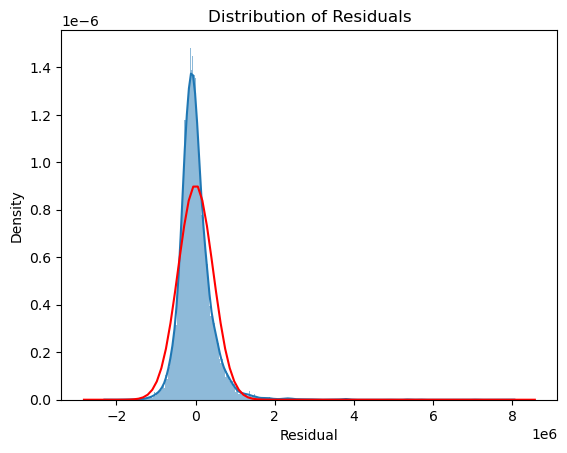

In [61]:
# create mean and standard deviation
mu, std = stats.norm.fit(residuals)
print(mu, std)  # 

# Re-plot the residuals as a kernel density plot and overlay the normal curve
fig, ax = plt.subplots()

# Plot the residuals
sns.histplot(x=residuals, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of Residuals", xlabel="Residual")

# Plot the corresponding normal curve
xmin, xmax = plt.xlim()  # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100)  # generate some x values
p = stats.norm.pdf(x, mu, std)  # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="red", ax=ax)

plt.show()


((array([-4.02138131, -3.8073916 , -3.69038892, ...,  3.69038892,
          3.8073916 ,  4.02138131]),
  array([-2300175.67293882, -2126200.55093144, -1920579.12016031, ...,
          7040060.78201132,  7061031.67804194,  8049371.02388848])),
 (401416.3383308964, -4.5986791357392244e-05, 0.9108553706041848))

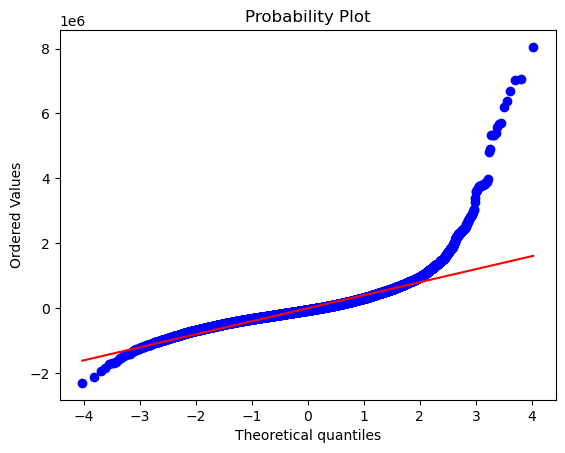

In [62]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)

# Creating third model removing outliers lower than 5% quartile and over 95% quartile

In [63]:
import pandas as pd
import numpy as np

# Define the DataFrame df

# List of columns to remove
columns_to_remove = ['address', 'date', 'lat', 'long', 'date', 'yr_built', 'yr_renovated', 'greenbelt', 'view', 'waterfront']

# Convert categorical variables to dummy variables
df_cleaned3 = pd.get_dummies(df, columns=['condition', 'heat_source', 'renovation_status', 'grade', 'nuisance', 'sewer_system'])

# Remove columns specified in columns_to_remove
df_cleaned3.drop(columns=columns_to_remove, inplace=True)

# Display the shape of the filtered DataFrame
print("Shape of filtered DataFrame:", df_cleaned3.shape)

# Filter the 'price' column to keep only the values between the 5th and 95th percentiles
price_percentile_05 = df_cleaned3['price'].quantile(0.05)
price_percentile_99 = df_cleaned3['price'].quantile(0.99)
price_mask = (df_cleaned3['price'] >= price_percentile_05) & (df_cleaned3['price'] <= price_percentile_99)
df_cleaned3 = df_cleaned3[price_mask]
print("Unique values of 'price' before filtering:", df_cleaned3['price'].unique())

# Filter the 'bedrooms' column to keep only the values between the 10th and 90th percentiles
bedrooms_percentile_10 = df_cleaned3['bedrooms'].quantile(0.10)
bedrooms_percentile_95 = df_cleaned3['bedrooms'].quantile(0.95)
bedrooms_mask = (df_cleaned3['bedrooms'] >= bedrooms_percentile_10) & (df_cleaned3['bedrooms'] <= bedrooms_percentile_95)
df_cleaned3 = df_cleaned3[bedrooms_mask]
print("Unique values of 'bedrooms' before filtering:", df_cleaned3['bedrooms'].unique())

# Filter the 'bathrooms' column to keep only the values between the 10th and 90th percentiles
bathrooms_percentile_10 = df_cleaned3['bathrooms'].quantile(0.10)
bathrooms_percentile_95 = df_cleaned3['bathrooms'].quantile(0.95)
bathrooms_mask = (df_cleaned3['bathrooms'] >= bedrooms_percentile_10) & (df_cleaned3['bathrooms'] <= bathrooms_percentile_95)
df_cleaned3 = df_cleaned3[bathrooms_mask]
print("Unique values of 'bathrooms' before filtering:", df_cleaned3['bathrooms'].unique())

# Display the shape of the filtered DataFrame
print("Shape of filtered DataFrame after filtering bedrooms:", df_cleaned3.shape)

# Print unique values of the 'sqft_living' column in df_cleaned3 before filtering
print("Unique values of 'sqft_living' before filtering:", df_cleaned3['sqft_living'].unique())

# Find the 1st and 99th percentile for the 'sqft_living' column
percentile_01_sqft_living = df_cleaned3['sqft_living'].quantile(0.01)
percentile_99_sqft_living = df_cleaned3['sqft_living'].quantile(0.99)

# Update the mask to exclude values outside the 1st and 99th percentiles for 'sqft_living'
mask_sqft_living = (df_cleaned3['sqft_living'] >= percentile_01_sqft_living) & (df_cleaned3['sqft_living'] <= percentile_99_sqft_living)

# Filter the DataFrame based on the mask for 'sqft_living'
df_cleaned3 = df_cleaned3[mask_sqft_living]

# Print the shape of the DataFrame after filtering the 'sqft_living' column
print("Shape of DataFrame after filtering 'sqft_living':", df_cleaned3.shape)

# Find the 1st and 99th percentile for the 'sqft_lot' column
percentile_01_sqft_lot = df_cleaned3['sqft_lot'].quantile(0.01)
percentile_99_sqft_lot = df_cleaned3['sqft_lot'].quantile(0.99)

# Filter the DataFrame to keep only the values between the 1st and 95th percentiles for 'sqft_lot'
df_cleaned3 = df_cleaned3[(df_cleaned3['sqft_lot'] >= percentile_01_sqft_lot) & (df_cleaned3['sqft_lot'] <= percentile_99_sqft_lot)]

# Find the 1st and 99th percentile for the 'sqft_garage' column
percentile_01_sqft_garage = df_cleaned3['sqft_garage'].quantile(0.01)
percentile_99_sqft_garage = df_cleaned3['sqft_garage'].quantile(0.99)

# Filter the DataFrame to keep only the values between the 1st and 99th percentiles for 'sqft_garage'
df_cleaned3['sqft_garage'] = np.where((df_cleaned3['sqft_garage'] >= percentile_01_sqft_garage) & (df_cleaned3['sqft_garage'] <= percentile_99_sqft_garage),
                                       df_cleaned3['sqft_garage'],  # Keep original values
                                       0)  # Replace values outside percentile range with 0

# Find the 1st and 99th percentile for the 'sqft_patio' column
percentile_01_sqft_patio = df_cleaned3['sqft_patio'].quantile(0.01)
percentile_99_sqft_patio = df_cleaned3['sqft_patio'].quantile(0.99)

# Filter the DataFrame to keep only the values between the 1st and 99th percentiles for 'sqft_patio'
df_cleaned3['sqft_patio'] = np.where((df_cleaned3['sqft_patio'] >= percentile_01_sqft_patio) & (df_cleaned3['sqft_patio'] <= percentile_99_sqft_patio),
                                     df_cleaned3['sqft_patio'],  # Keep original values
                                     0)  # Replace values outside percentile range with 0

# Find the 1st and 99th percentile for the 'sqft_basement' column
percentile_01_sqft_basement = df_cleaned3['sqft_basement'].quantile(0.01)
percentile_99_sqft_basement = df_cleaned3['sqft_basement'].quantile(0.99)

# Filter the DataFrame to keep only the values between the 1st and 99th percentiles for 'sqft_basement'
df_cleaned3['sqft_basement'] = np.where((df_cleaned3['sqft_basement'] >= percentile_01_sqft_basement) & (df_cleaned3['sqft_basement'] <= percentile_99_sqft_basement),
                                         df_cleaned3['sqft_basement'],  # Keep original values
                                         0)  # Replace values outside percentile range with 0

# Print the shape of the DataFrame after removing outliers from the 'sqft_lot' column
print("Shape of DataFrame after removing outliers from 'sqft_lot':", df_cleaned3.shape)

# Find the 1st and 99th percentile for the 'sqft_above' column
percentile_01_sqft_above = df_cleaned3['sqft_above'].quantile(0.01)
percentile_99_sqft_above = df_cleaned3['sqft_above'].quantile(0.99)

# Filter the DataFrame to keep only the values between the 1st and 99th percentiles for 'sqft_above'
df_cleaned3 = df_cleaned3[(df_cleaned3['sqft_above'] >= percentile_01_sqft_above) & (df_cleaned3['sqft_above'] <= percentile_99_sqft_above)]

# Print the shape of the DataFrame after removing outliers from the 'sqft_above' column
print("Shape of DataFrame after removing outliers from 'sqft_above':", df_cleaned3.shape)



Shape of filtered DataFrame: (30155, 44)
Unique values of 'price' before filtering: [ 675000.  920000.  775000. ... 3754500. 2435000.  656500.]
Unique values of 'bedrooms' before filtering: [4 5 3 2]
Unique values of 'bathrooms' before filtering: [2.5 3.  2.  3.5]
Shape of filtered DataFrame after filtering bedrooms: (21150, 44)
Unique values of 'sqft_living' before filtering: [2770 2160 1120 2080 2214 2340 2980 2130 1280 3170 2408 1980 2420 1670
 1000 1640 1590 3400 1820 2020 2700 2390 1570 1530 1350 3640 2300 2640
 5200 1830 1790 2150 4180 1920 3030 3450 1240 2170 1880 1630 1890 1220
 1210 3890 1150 3470 3080 3360 1720 3210 1660 1130 3120 2520 2030 1490
 1715 2190 1650 1510 1740 3220 3040 2070 1260 3171 2110 1960 2470 1360
 3340 1400 1560 1330 2430 2290 1850 2350 1290 3870 3320 4540 2570 2760
 4170 3250 1940 3090 3460 1730 2910  960 2060 2370 1680 2990 2180 1500
 1700 1860 2530 3150 1910 3420 1440 1470 2220 2500 1480 1310 1600 2200
 1160 3760 2230 1380 2000 2790 2120 2410 2050 1180 1

In [64]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the dependent variable y
y = df_cleaned3['price']

# Add a constant term to the independent variables for the intercept
X = sm.add_constant(df_cleaned3.drop(columns=['price']))  # Drop the dependent variable

# Fit the OLS model
model3 = sm.OLS(y, X).fit()

# Print the model summary
print(model3.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     437.4
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:41:50   Log-Likelihood:            -2.8579e+05
No. Observations:               19931   AIC:                         5.717e+05
Df Residuals:                   19895   BIC:                         5.719e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

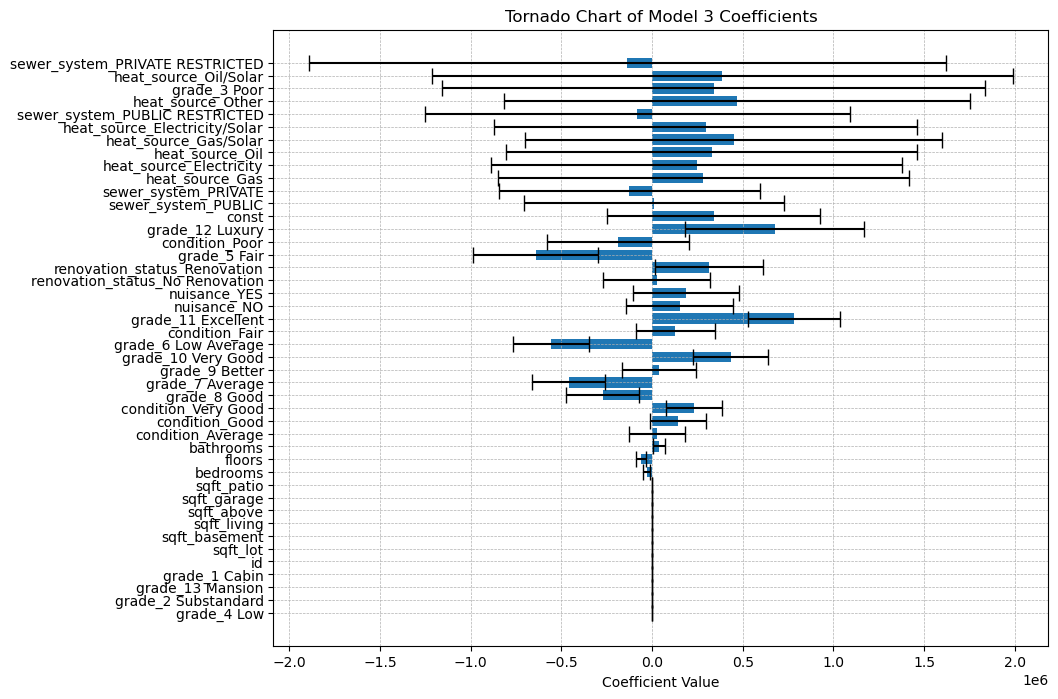

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting coefficients and their standard errors
coefficients = model3.params
standard_errors = model3.bse

# Calculating the range of values for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors
range_of_values = upper_bound - lower_bound

# Sorting coefficients by their absolute values
sorted_indices = range_of_values.abs().sort_values().index
sorted_coefficients = coefficients[sorted_indices]
sorted_range_of_values = range_of_values[sorted_indices]

# Plotting the tornado chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_coefficients.index, sorted_coefficients, xerr=sorted_range_of_values, capsize=6)
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Model 3 Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()




In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions using the model
predictions = model3.predict(X)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 294238.2545008759
Root Mean Squared Error (RMSE): 408483.3000236864


In [67]:
# Filter coefficients based on p-values
significant_vars3 = model3.params[model3.pvalues < 0.05]

# Display coefficients of significant variables
print(significant_vars3)

const                           339283.172073
id                                  -0.000002
bedrooms                        -28879.239768
bathrooms                        39334.695359
sqft_living                        160.388350
sqft_lot                             0.765432
floors                          -62603.119759
sqft_above                         122.676961
sqft_basement                      118.622017
sqft_garage                       -214.696087
sqft_patio                          86.352887
condition_Fair                  126727.530217
condition_Good                  143869.833260
condition_Very Good             229475.217200
renovation_status_Renovation    313621.365309
grade_10 Very Good              432563.367963
grade_11 Excellent              783224.676379
grade_12 Luxury                 676843.488181
grade_5 Fair                   -642060.122744
grade_6 Low Average            -557595.564207
grade_7 Average                -459073.917434
grade_8 Good                   -27

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     437.4
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:41:51   Log-Likelihood:            -2.8579e+05
No. Observations:               19931   AIC:                         5.717e+05
Df Residuals:                   19895   BIC:                         5.719e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

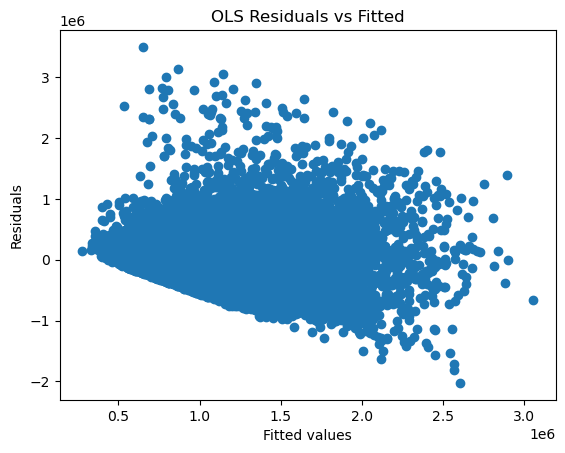

In [68]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the dependent variable y
y = df_cleaned3['price']

# Add a constant term to the independent variables for the intercept
X = sm.add_constant(df_cleaned3.drop(columns=['price']))  # Drop the dependent variable

# Fit the OLS model
model4 = sm.OLS(y, X).fit()

# Print the model summary
print(model4.summary())

# Filter coefficients based on p-values
significant_vars4 = model4.params[model4.pvalues < 0.05]

# Display coefficients of significant variables
print(significant_vars4)

# Plot OLS chart
plt.scatter(model4.fittedvalues, model4.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("OLS Residuals vs Fitted")
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     437.4
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:41:51   Log-Likelihood:            -2.8579e+05
No. Observations:               19931   AIC:                         5.717e+05
Df Residuals:                   19895   BIC:                         5.719e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

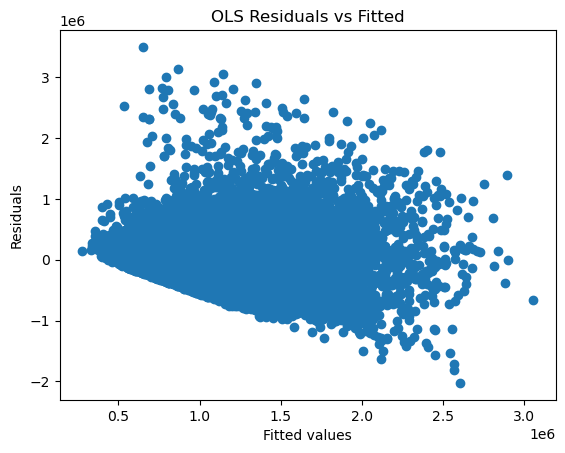

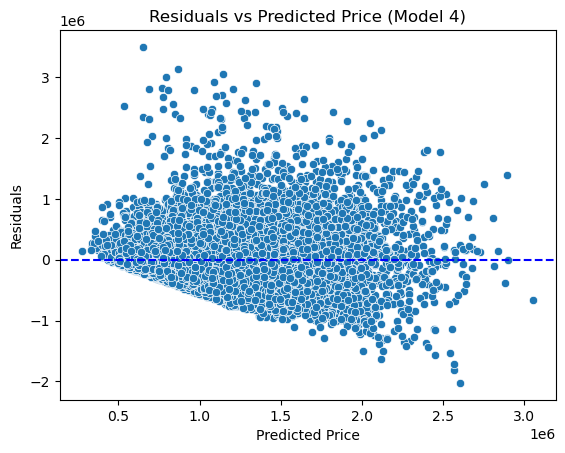

Mean Absolute Error (MAE) for Model 4: 294238.2545008759
Root Mean Squared Error (RMSE) for Model 4: 408483.3000236864


In [69]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the dependent variable y
y = df_cleaned3['price']

# Add a constant term to the independent variables for the intercept
X = sm.add_constant(df_cleaned3.drop(columns=['price']))  # Drop the dependent variable

# Fit the OLS model
model4 = sm.OLS(y, X).fit()

# Print the model summary
print(model4.summary())

# Filter coefficients based on p-values
significant_vars4 = model4.params[model4.pvalues < 0.05]

# Display coefficients of significant variables
print(significant_vars4)

# Plot OLS chart
plt.scatter(model4.fittedvalues, model4.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("OLS Residuals vs Fitted")
plt.show()

# Predictions using significant variables (assuming model4 is the model of interest)
y_pred_model4 = model4.predict(X)

# Residuals calculation for model4
residuals_model4 = df_cleaned3['price'] - y_pred_model4

# Create a DataFrame with predicted values and residuals for model4
residuals_df_model4 = pd.DataFrame({'Predicted Price': y_pred_model4, 'Residuals': residuals_model4})

# Plot residuals against predicted values for model4
p = sns.scatterplot(x='Predicted Price', y='Residuals', data=residuals_df_model4)
plt.axhline(y=0, color='blue', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price (Model 4)')
plt.show()

# Calculate Mean Absolute Error (MAE) for model4
mae_model4 = mean_absolute_error(df_cleaned3['price'], y_pred_model4)
print("Mean Absolute Error (MAE) for Model 4:", mae_model4)

# Calculate Root Mean Squared Error (RMSE) for model4
rmse_model4 = mean_squared_error(df_cleaned3['price'], y_pred_model4, squared=False)
print("Root Mean Squared Error (RMSE) for Model 4:", rmse_model4)



In [70]:

significant_predictors = df_cleaned3[significant_vars4.index.drop('const')]

# Perform Goldfeld-Quandt test
gq_test_statistic, gq_test_pvalue, gq_test_distribution = sms.het_goldfeldquandt(y=residuals_model4, x=significant_predictors)

print("Goldfeld-Quandt test statistic:", gq_test_statistic)
print("Goldfeld-Quandt test p-value:", gq_test_pvalue)
print("Goldfeld-Quandt test distribution:", gq_test_distribution)





Goldfeld-Quandt test statistic: 0.9419467162496467
Goldfeld-Quandt test p-value: 0.9985654249826621
Goldfeld-Quandt test distribution: increasing


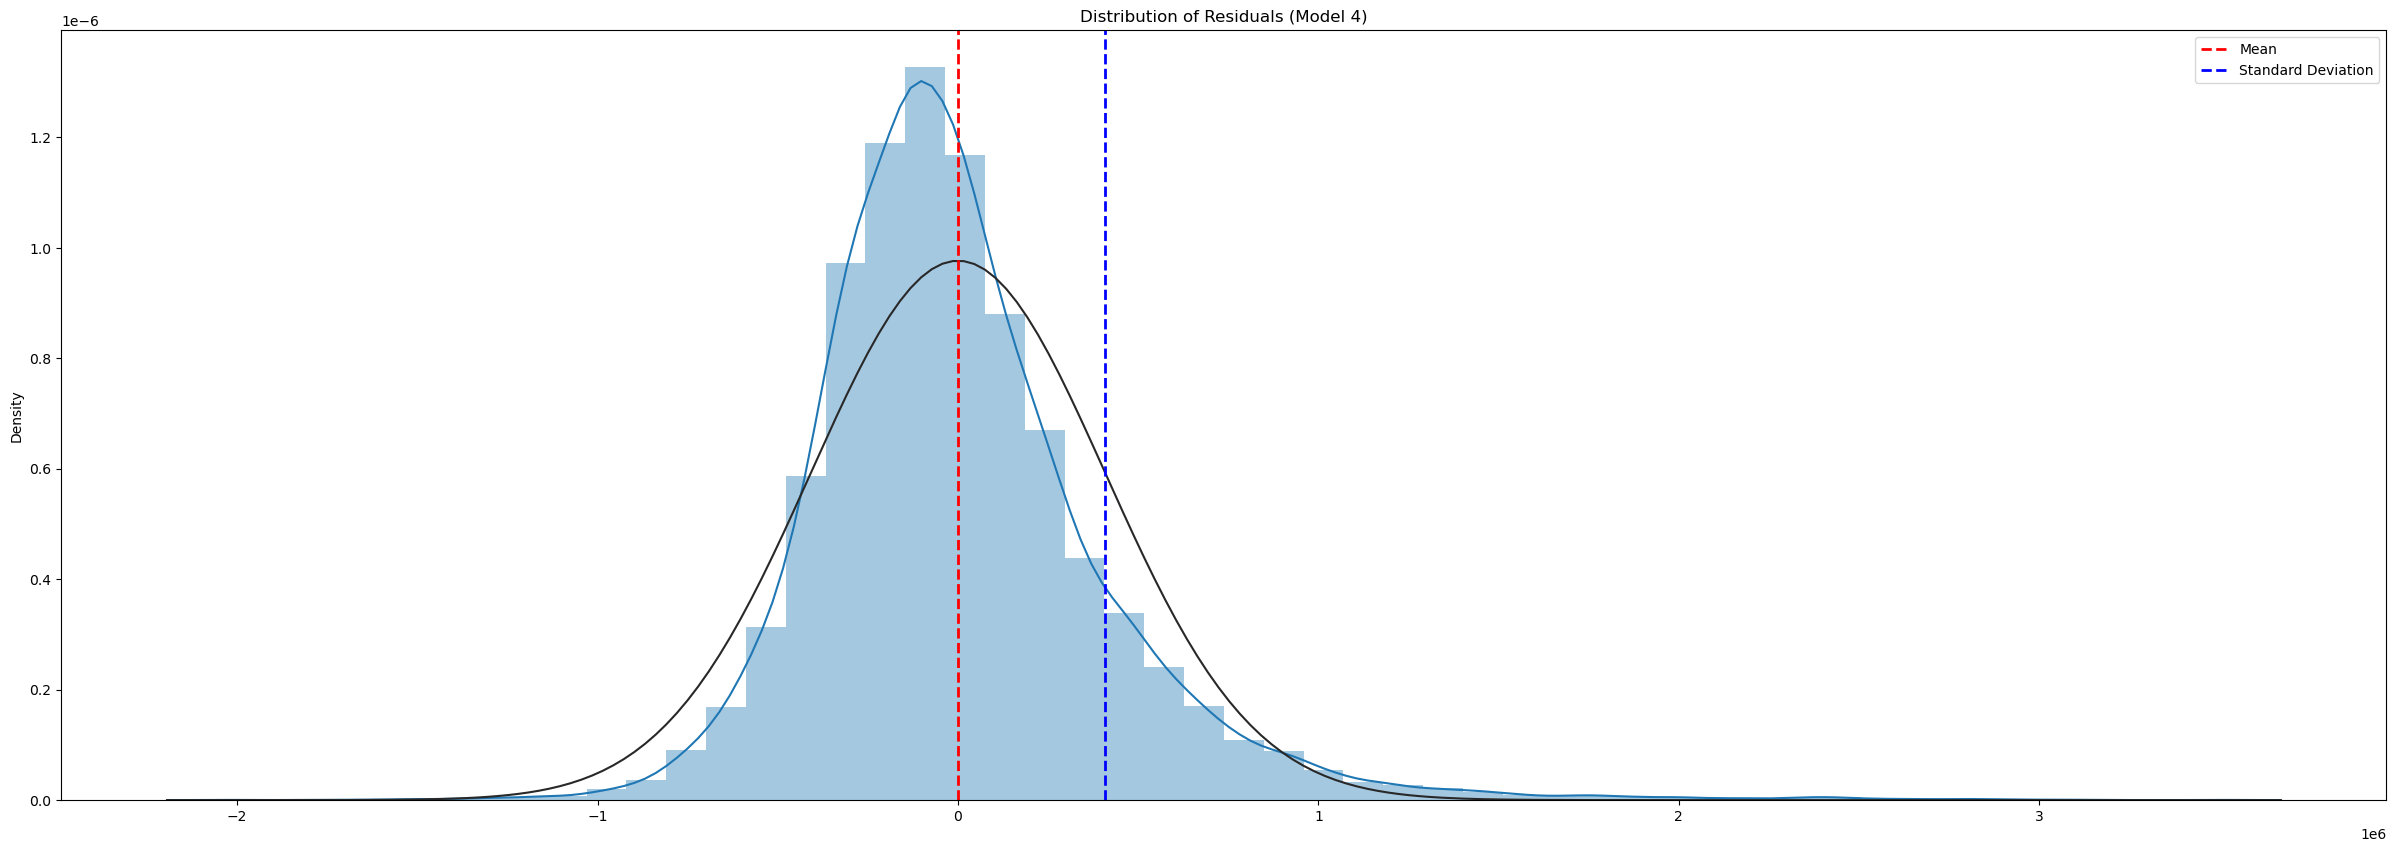

In [71]:
from scipy.stats import norm

# Residuals calculation for model4
residuals_model4 = df_cleaned3['price'] - y_pred_model4

# Set a larger figure size
plt.figure(figsize=(30, 10))

# Plot the distribution of residuals for model4
p = sns.distplot(residuals_model4, fit=norm, kde=True)
p = plt.title('Distribution of Residuals (Model 4)')

# Add a line to represent a normal distribution
plt.axvline(residuals_model4.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(residuals_model4.std(), color='blue', linestyle='dashed', linewidth=2, label='Standard Deviation')

# Show legend
plt.legend()

# Show the plot
plt.show()


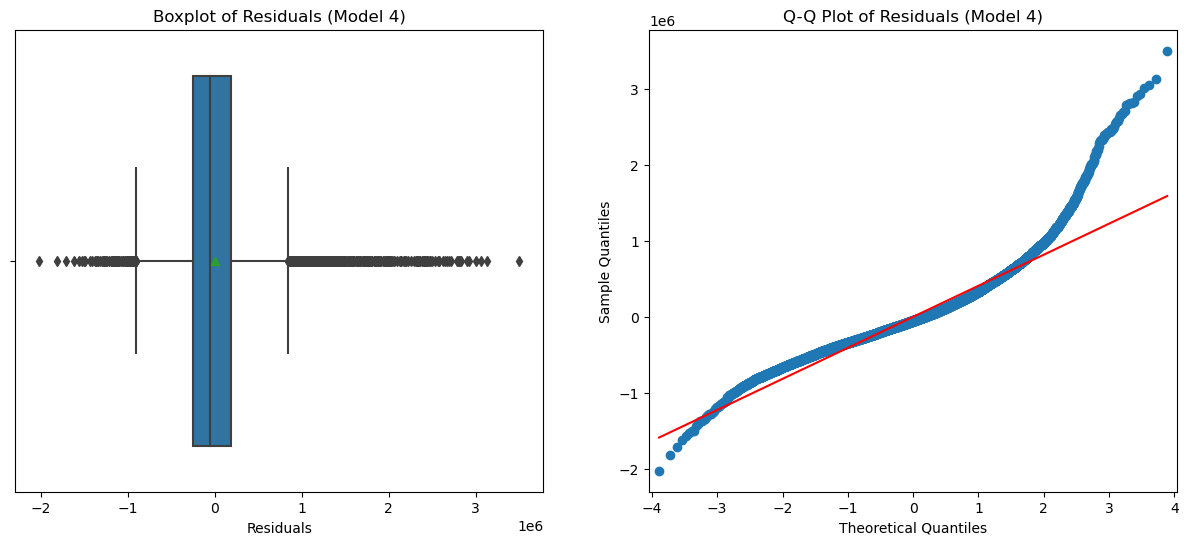

In [73]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Convert residuals_model4 to a DataFrame or a Series
residuals_df = pd.DataFrame(residuals_model4, columns=['Residuals'])

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot of residuals for model4
sns.boxplot(data=residuals_df, x='Residuals', showmeans=True, ax=axes[0])
axes[0].set_title('Boxplot of Residuals (Model 4)')

# Q-Q plot of residuals for model4
sm.qqplot(residuals_model4, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals (Model 4)')

# Show the plots
plt.show()



In [74]:
from statsmodels.stats.stattools import durbin_watson

# Residuals calculation for model4
residuals_model4 = df_cleaned3['price'] - y_pred_model4

# Calculate the Durbin-Watson statistic for model4
dw_statistic_model4 = durbin_watson(residuals_model4)
print("Durbin-Watson Statistic (Model 4):", dw_statistic_model4)


Durbin-Watson Statistic (Model 4): 1.9637895495273732


In [ ]:
#### Value is close to 2 which suggests that there is no autocorrelation in the residuals. 

In [75]:
# Get the coefficients for the grade categories from the regression model4
grade_coefficients_model4 = model4.params.filter(like='grade_')

# Calculate the average price for each grade category using the coefficients from model4
avg_price_by_grade_model4 = {}
for grade_category in grade_coefficients_model4.index:
    avg_price_by_grade_model4[grade_category] = df_cleaned3[df_cleaned3[grade_category] == 1]['price'].mean()

# Print the average price for each grade category for model4
print("Average price by grade for Model 4:")
for grade, avg_price in avg_price_by_grade_model4.items():
    print(f"{grade}: {avg_price}")



Average price by grade for Model 4:
grade_1 Cabin: nan
grade_10 Very Good: 2000209.438692098
grade_11 Excellent: 2455407.736263736
grade_12 Luxury: 2436050.0
grade_13 Mansion: nan
grade_2 Substandard: nan
grade_3 Poor: 1515000.0
grade_4 Low: nan
grade_5 Fair: 643750.0
grade_6 Low Average: 755234.3895253682
grade_7 Average: 857515.1323093505
grade_8 Good: 1079990.0941220704
grade_9 Better: 1486663.347072293


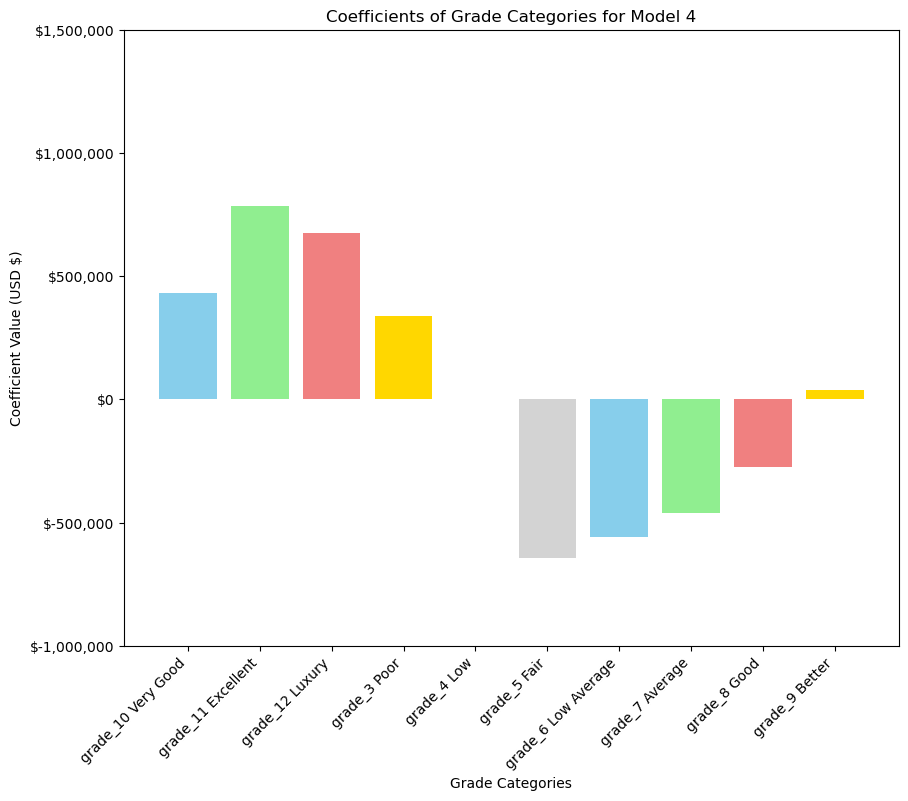

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out NaN values and remove specific grade categories
grade_coefficients = model4.params.filter(like='grade_')
grade_coefficients = grade_coefficients.dropna()
grade_coefficients = grade_coefficients.drop(['grade_1 Cabin', 'grade_13 Mansion', 'grade_2 Substandard'])

# Define the y-axis limits and ticks
y_min = -1e6
y_max = 1.5e6
y_ticks = np.arange(y_min, y_max + 500000, 500000)

# Define colors for each remaining grade category
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink', 'lightgrey']  # Adjust as needed for more categories

# Create a bar chart for grade coefficients
plt.figure(figsize=(10, 8))
plt.bar(grade_coefficients.index, grade_coefficients, color=colors[:len(grade_coefficients)])
plt.xlabel('Grade Categories')
plt.ylabel('Coefficient Value (USD $)')
plt.title('Coefficients of Grade Categories for Model 4')
plt.yticks(y_ticks, ['${:,.0f}'.format(tick) for tick in y_ticks])  # Format y-tick labels as USD
plt.ylim(y_min, y_max)
plt.xticks(rotation=45, ha='right')
plt.show()


In [77]:
# Count the number of unique values in the 'grade_3' category
num_unique_grade_3 = len(df_cleaned3['grade_3 Poor'].unique())

# Print the number of unique values
print("Number of unique values in grade_3:", num_unique_grade_3)


Number of unique values in grade_3: 2


In [78]:
# Define the DataFrame containing grade columns
grade_df = df_cleaned3[['grade_1 Cabin', 'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good', 'grade_9 Better']]

# Sum the values for each grade category
grade_counts = grade_df.sum()

# Print the counts
print("Grade 1 Cabin:", grade_counts['grade_1 Cabin'])
print("Grade 10 Very Good:", grade_counts['grade_10 Very Good'])
print("Grade 11 Excellent:", grade_counts['grade_11 Excellent'])
print("Grade 12 Luxury:", grade_counts['grade_12 Luxury'])
print("Grade 13 Mansion:", grade_counts['grade_13 Mansion'])
print("Grade 2 Substandard:", grade_counts['grade_2 Substandard'])
print("Grade 3 Poor:", grade_counts['grade_3 Poor'])
print("Grade 4 Low:", grade_counts['grade_4 Low'])
print("Grade 5 Fair:", grade_counts['grade_5 Fair'])
print("Grade 6 Low Average:", grade_counts['grade_6 Low Average'])
print("Grade 7 Average:", grade_counts['grade_7 Average'])
print("Grade 8 Good:", grade_counts['grade_8 Good'])
print("Grade 9 Better:", grade_counts['grade_9 Better'])



Grade 1 Cabin: 0
Grade 10 Very Good: 734
Grade 11 Excellent: 91
Grade 12 Luxury: 10
Grade 13 Mansion: 0
Grade 2 Substandard: 0
Grade 3 Poor: 1
Grade 4 Low: 0
Grade 5 Fair: 26
Grade 6 Low Average: 611
Grade 7 Average: 7422
Grade 8 Good: 7979
Grade 9 Better: 3057


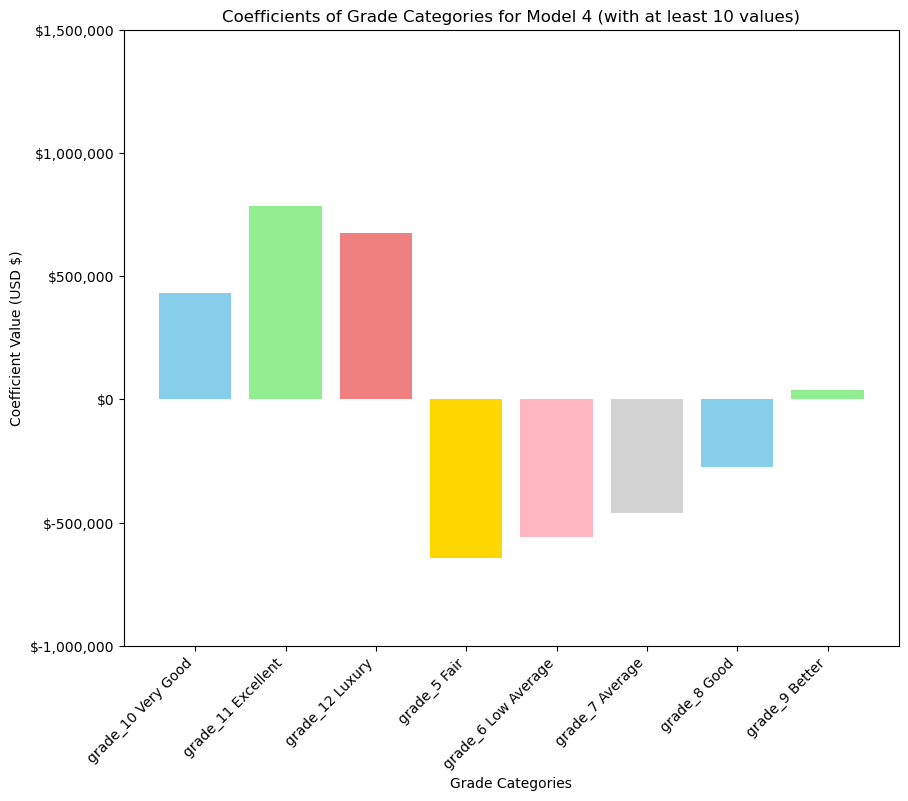

In [79]:
# Filter out NaN values and remove specific grade categories
grade_coefficients = model4.params.filter(like='grade_')
grade_coefficients = grade_coefficients.dropna()
excluded_grades = ['grade_1 Cabin', 'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low']
grade_coefficients = grade_coefficients.drop(excluded_grades)

# Define the minimum count threshold
min_count = 10

# Filter out grade categories with counts less than the minimum threshold
filtered_grades = [grade for grade, count in grade_counts.items() if count >= min_count]
grade_coefficients = grade_coefficients.loc[filtered_grades]

# Define the y-axis limits and ticks
y_min = -1e6
y_max = 1.5e6
y_ticks = np.arange(y_min, y_max + 500000, 500000)

# Define colors for each remaining grade category
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink', 'lightgrey']  # Adjust as needed for more categories

# Create a bar chart for grade coefficients
plt.figure(figsize=(10, 8))
plt.bar(grade_coefficients.index, grade_coefficients, color=colors[:len(grade_coefficients)])
plt.xlabel('Grade Categories')
plt.ylabel('Coefficient Value (USD $)')
plt.title('Coefficients of Grade Categories for Model 4 (with at least 10 values)')
plt.yticks(y_ticks, ['${:,.0f}'.format(tick) for tick in y_ticks])  # Format y-tick labels as USD
plt.ylim(y_min, y_max)
plt.xticks(rotation=45, ha='right')
plt.show()



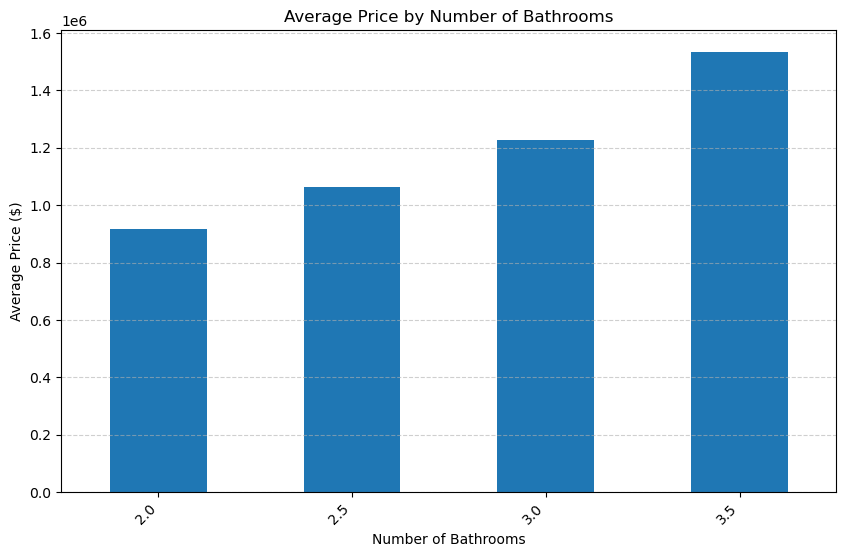

In [80]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df_cleaned3 with columns 'price' and 'bathrooms'
avg_price_by_bathrooms = df_cleaned3.groupby('bathrooms')['price'].mean()

# Plot the average price by number of bathrooms
plt.figure(figsize=(10, 6))
avg_price_by_bathrooms.plot(kind='bar')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for better readability
plt.show()

